In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
import plotly.graph_objs as go
import numpy as np
import warnings
import plotly.graph_objects as go
warnings.filterwarnings("ignore")

In [52]:
df=pd.read_csv(r"..\processed data\temp\colombo_fomaldehyde.csv")
print(df.shape)
df.head(10)

(1826, 4)


Current_Date        Location   Next_Date  HCHO_reading
0   2019-01-01  Colombo Proper  2019-01-02      0.000197
1   2019-01-02  Colombo Proper  2019-01-03      0.000263
2   2019-01-03  Colombo Proper  2019-01-04      0.000099
3   2019-01-04  Colombo Proper  2019-01-05      0.000210
4   2019-01-05  Colombo Proper  2019-01-06      0.000179
5   2019-01-06  Colombo Proper  2019-01-07      0.000108
6   2019-01-07  Colombo Proper  2019-01-08      0.000393
7   2019-01-08  Colombo Proper  2019-01-09      0.000092
8   2019-01-09  Colombo Proper  2019-01-10      0.000121
9   2019-01-10  Colombo Proper  2019-01-11      0.000130

In [3]:
df['Current_Date']=pd.to_datetime(df['Current_Date'])

In [4]:
# df.set_index('Current_Date', inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Current_Date  1826 non-null   datetime64[ns]
 1   Location      1826 non-null   object        
 2   Next_Date     1826 non-null   object        
 3   rolling_3     1826 non-null   float64       
 4   HCHO_reading  1826 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 71.5+ KB


# 1  Colombo

# FB Prophet

In [6]:
# pip install prophet

In [11]:
from prophet import Prophet
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error


In [20]:
data = pd.read_csv(r"..\processed data\temp\colombo_fomaldehyde.csv")
data.drop(columns=['Location','Next_Date'],inplace=True)
data.rename(columns={'Current_Date': 'ds', 'HCHO_reading': 'y'}, inplace=True)
data['ds'] = pd.to_datetime(data['ds'])

# Test size can be adjusted based on your needs (e.g., 0.2 for 20% test data)
train, test = train_test_split(data, test_size=0.1, shuffle=False)

In [21]:
covid_holidays = pd.DataFrame({
    'holiday': 'covid_19',
    'ds': pd.to_datetime(['2020-03-01', '2022-03-01']),
    #'lower_window': 0,
    #'upper_window': 1,
})

# Create the model (data argument removed)
model = Prophet( changepoint_prior_scale=0.45,  # More flexible trend try-0.2
                 seasonality_prior_scale=5,
                 holidays=covid_holidays,
                yearly_seasonality=True
               )

# Fit the model on the training data
model.fit(train)

future = model.make_future_dataframe(periods=len(test))
forecast = model.predict(future)

r2=r2_score(test['y'], forecast[forecast['ds'].isin(test['ds'])]['yhat'])
mse=mean_squared_error(test['y'], forecast[forecast['ds'].isin(test['ds'])]['yhat'])
print(r2)
print(mse)

15:14:15 - cmdstanpy - INFO - Chain [1] start processing
15:14:15 - cmdstanpy - INFO - Chain [1] done processing


0.20722402948431462
4.569194718038498e-09


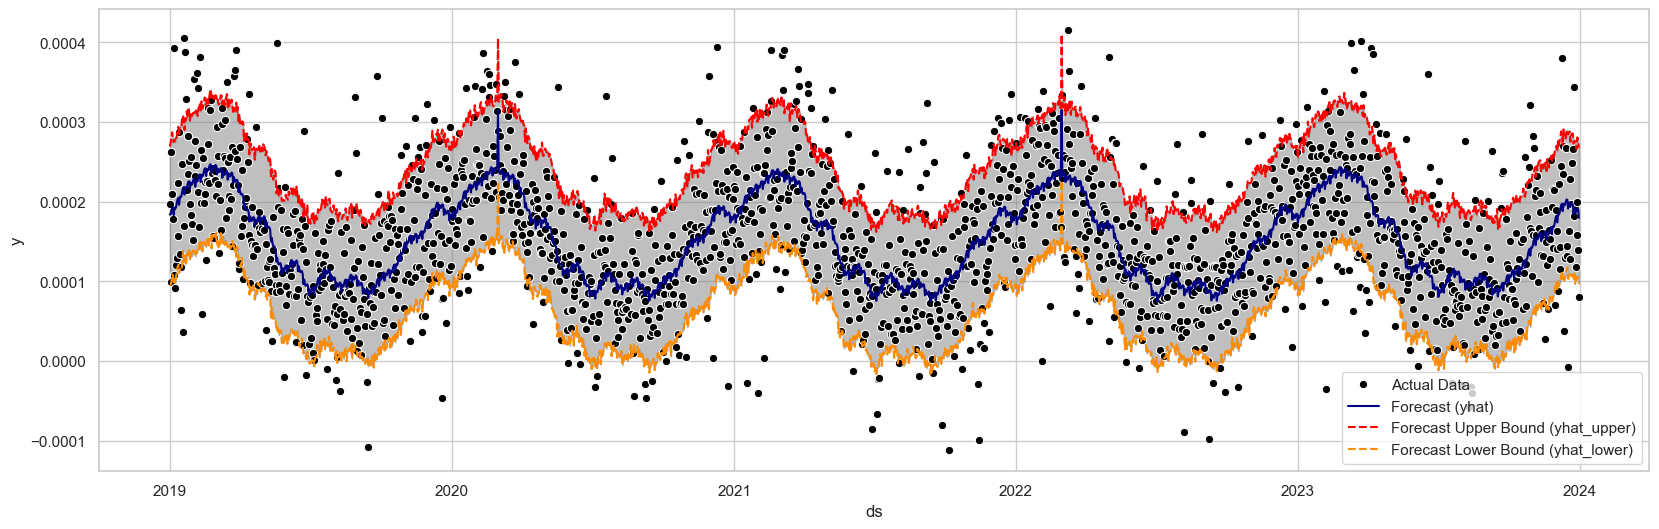

In [24]:
plt.figure(figsize=(20, 6))

# Plot actual data
sns.lineplot(data=data, x='ds', y='y', label='Actual Data', color='black', marker='o', linestyle='None')

# Plot yhat - forecast
sns.lineplot(data=forecast, x='ds', y='yhat', label='Forecast (yhat)', color='navy')

# Plot yhat_upper
sns.lineplot(data=forecast, x='ds', y='yhat_upper', label='Forecast Upper Bound (yhat_upper)', color='red', linestyle='--')

# Plot yhat_lower
sns.lineplot(data=forecast, x='ds', y='yhat_lower', label='Forecast Lower Bound (yhat_lower)', color='darkorange', linestyle='--')

plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='grey', alpha=0.5, label='Confidence_interval')

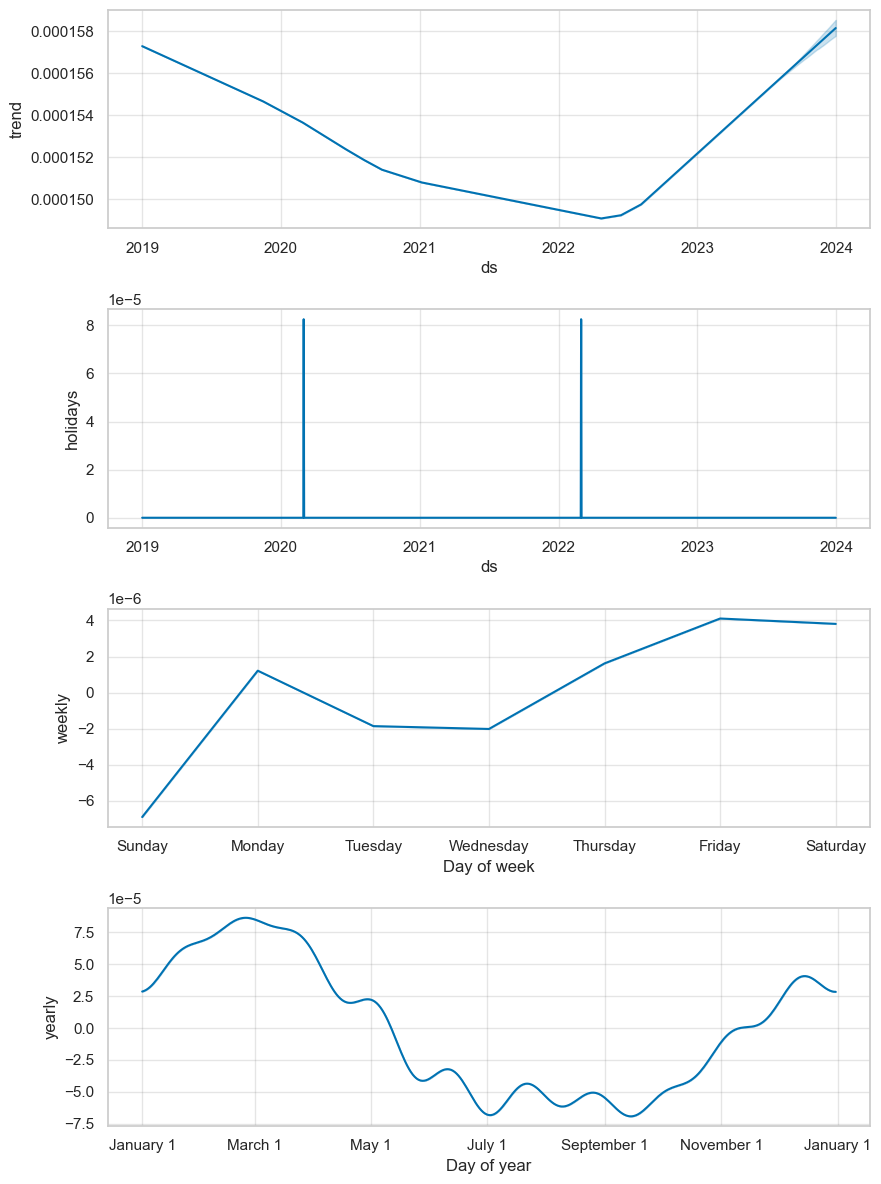

In [25]:
# Plot the forecast components
fig2 = model.plot_components(forecast)

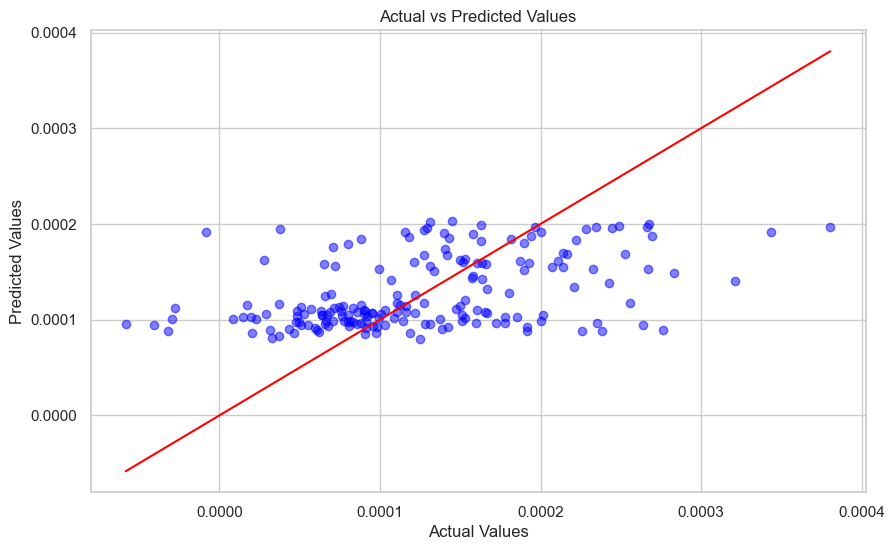

In [219]:
import matplotlib.pyplot as plt

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(test['y'], forecast[forecast['ds'].isin(test['ds'])]['yhat'], color='blue', alpha=0.5)  # Scatter plot of actual vs predicted
plt.plot([min(test['y']), max(test['y'])], [min(test['y']), max(test['y'])], color='red')  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()
#(test['y'], forecast[forecast['ds'].isin(test['ds'])]['yhat'])

# LSTM

Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 44s 709ms/step - loss: 0.0667
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 31s 701ms/step - loss: 0.0221
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 32s 716ms/step - loss: 0.0199
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 31s 691ms/step - loss: 0.0211
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 27s 608ms/step - loss: 0.0227
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 28s 626ms/step - loss: 0.0217
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 30s 669ms/step - loss: 0.0209
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 31s 684ms/step - loss: 0.0190
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 31s 687ms/step - loss: 0.0191
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 30s 658ms/step - loss: 0.0181
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 0.0183
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - loss: 0.0212
Train Loss: 0.018062036484479904
Test Loss: 0.01976044848561287
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 224ms/step


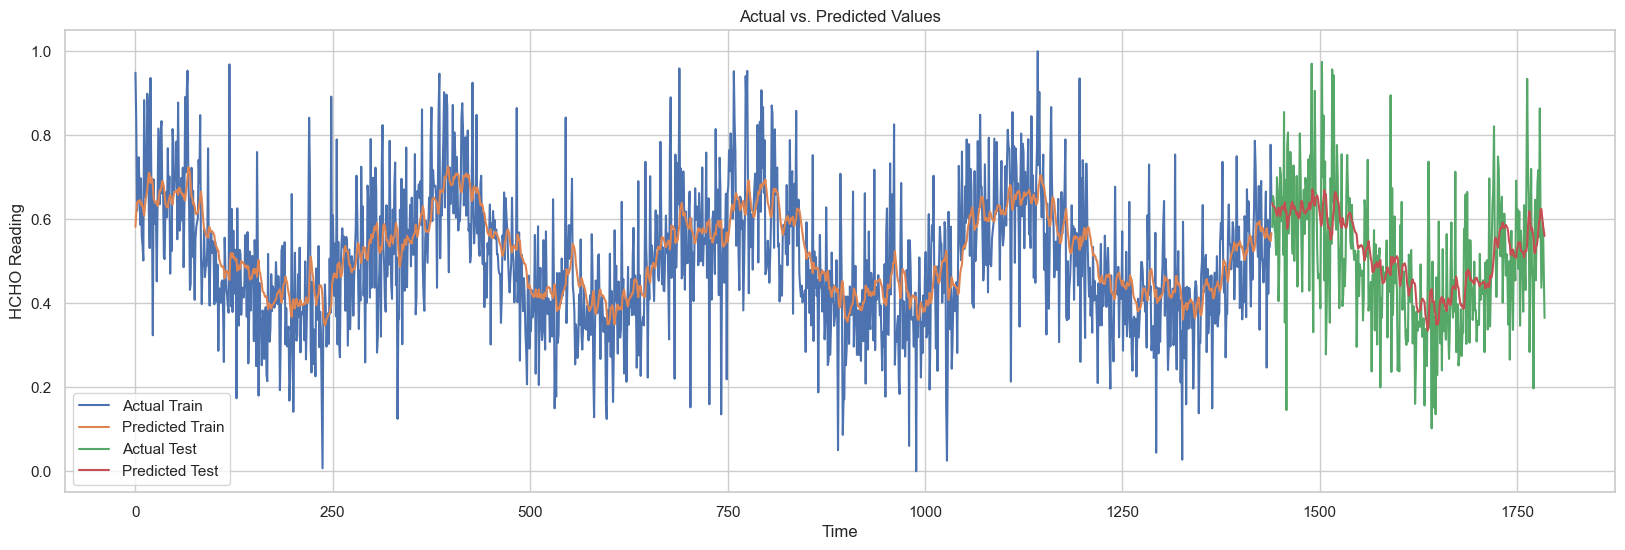

Train MSE: 0.018062036658621876
Test MSE: 0.019608073752144756
Train R2 Score: 0.325177314801504
Test R2 Score: 0.22404315931641183


In [28]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load dataset

data = pd.read_csv(r"..\processed data\temp\colombo_fomaldehyde.csv")
data.drop(columns=['Location','Next_Date'],inplace=True)

# Preprocessing
scaler = MinMaxScaler()
data['HCHO_reading'] = scaler.fit_transform(data['HCHO_reading'].values.reshape(-1, 1))

# Test size can be adjusted based on your needs (e.g., 0.2 for 20% test data)
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)

# Define function to create sequences of data
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length)])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Choose sequence length (number of time steps to consider)
seq_length =20

# Create sequences for training
X_train, y_train = create_sequences(train_data['HCHO_reading'].values, seq_length)
X_test, y_test = create_sequences(test_data['HCHO_reading'].values, seq_length)

# Define the LSTM model
# model = Sequential([
#     LSTM(units=50, input_shape=(X_train.shape[1], 1)),
#     Dense(units=1)
# ])
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import RMSprop


model = Sequential([
    Bidirectional(LSTM(units=500, return_sequences=True), input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    Bidirectional(LSTM(units=400, return_sequences=True)),
    Dropout(0.2),
    Bidirectional(LSTM(units=200, return_sequences=True)),
    Dropout(0.2),
    Bidirectional(LSTM(units=100, return_sequences=True)),  # New Bidirectional LSTM layer
    Dropout(0.2),  
    Bidirectional(LSTM(units=50)),  
    Dropout(0.2),  
    Dense(units=1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
train_loss = model.evaluate(X_train, y_train)
test_loss = model.evaluate(X_test, y_test)

print(f'Train Loss: {train_loss}')
print(f'Test Loss: {test_loss}')


y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

plt.figure(figsize=(20, 6))
plt.plot(np.arange(len(y_train)), y_train, label='Actual Train')
plt.plot(np.arange(len(y_train_pred)), y_train_pred, label='Predicted Train')
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, label='Actual Test')
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test_pred)), y_test_pred, label='Predicted Test')
plt.xlabel('Time')
plt.ylabel('HCHO Reading')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()


# Calculate Mean Squared Error (MSE)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')

# Calculate R2 Score
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Train R2 Score: {train_r2}')
print(f'Test R2 Score: {test_r2}')


Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0168 - val_loss: 0.0193
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0169 - val_loss: 0.0196
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0187 - val_loss: 0.0200
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0171 - val_loss: 0.0194
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0168 - val_loss: 0.0194
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0190 - val_loss: 0.0191
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0174 - val_loss: 0.0194
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0176 - val_loss: 0.0191
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0183 - val_loss: 0.0193
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0184 - val_loss: 0.0192


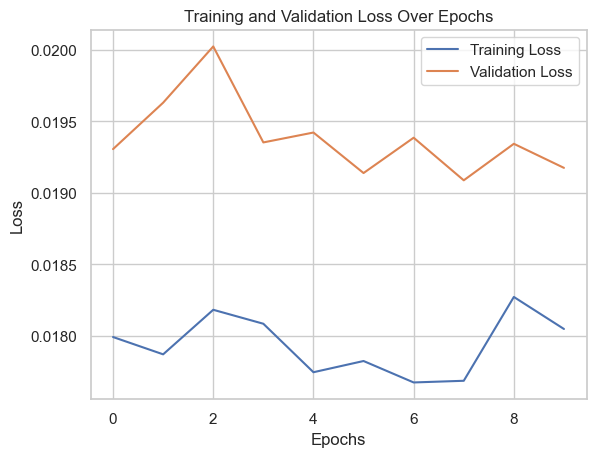

In [75]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()


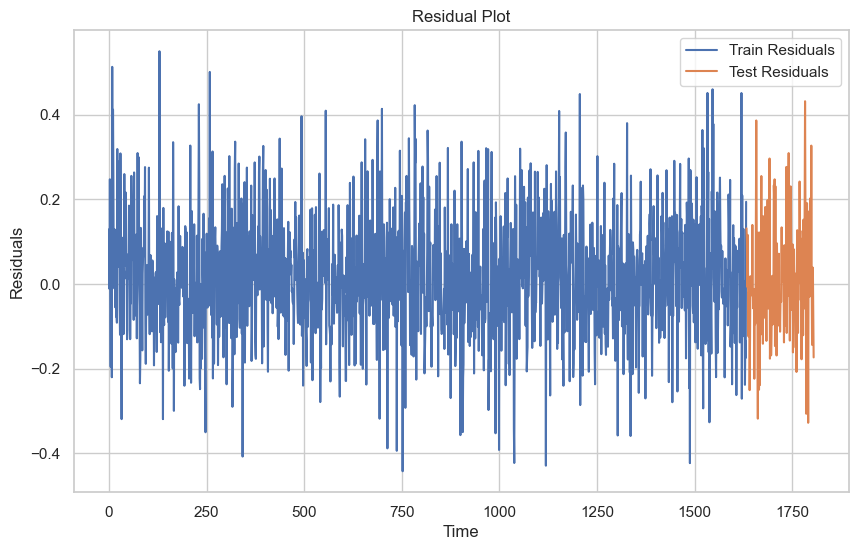

In [50]:
train_residuals = y_train - y_train_pred.flatten()
test_residuals = y_test - y_test_pred.flatten()

plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(train_residuals)), train_residuals, label='Train Residuals')
plt.plot(np.arange(len(y_train), len(y_train) + len(test_residuals)), test_residuals, label='Test Residuals')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend()
plt.show()


Epoch 1/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 16s 87ms/step - loss: 0.1375 - mean_squared_error: 0.1375 - val_loss: 0.0211 - val_mean_squared_error: 0.0212
Epoch 2/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 0.0330 - mean_squared_error: 0.0330 - val_loss: 0.0268 - val_mean_squared_error: 0.0270
Epoch 3/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 0.0320 - mean_squared_error: 0.0320 - val_loss: 0.0165 - val_mean_squared_error: 0.0164
Epoch 4/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 0.0302 - mean_squared_error: 0.0302 - val_loss: 0.0187 - val_mean_squared_error: 0.0184
Epoch 5/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 0.0270 - mean_squared_error: 0.0271 - val_loss: 0.0207 - val_mean_squared_error: 0.0207
Epoch 6/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - loss: 0.0259 - mean_squared_error: 0.0259 - val_loss: 0.0165 - val_mean_squared_error: 0.0165
Epoch 7/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 0.0273 - mean_squared_error: 0.0273 - val_loss: 0.0

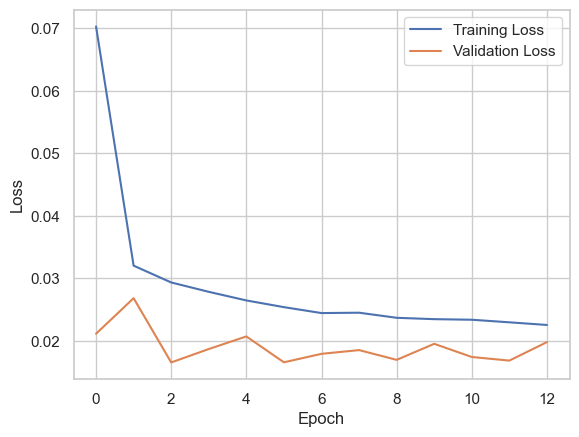

46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Training MAE: 6.220995577794052e-05
Testing MAE: 6.4581962619938e-05
Training MSE: 6.5131272864601215e-09
Testing MSE: 6.7975337737647734e-09
Training R2 Score: 0.1293955420662316
Testing R2 Score: 0.033332604738426364


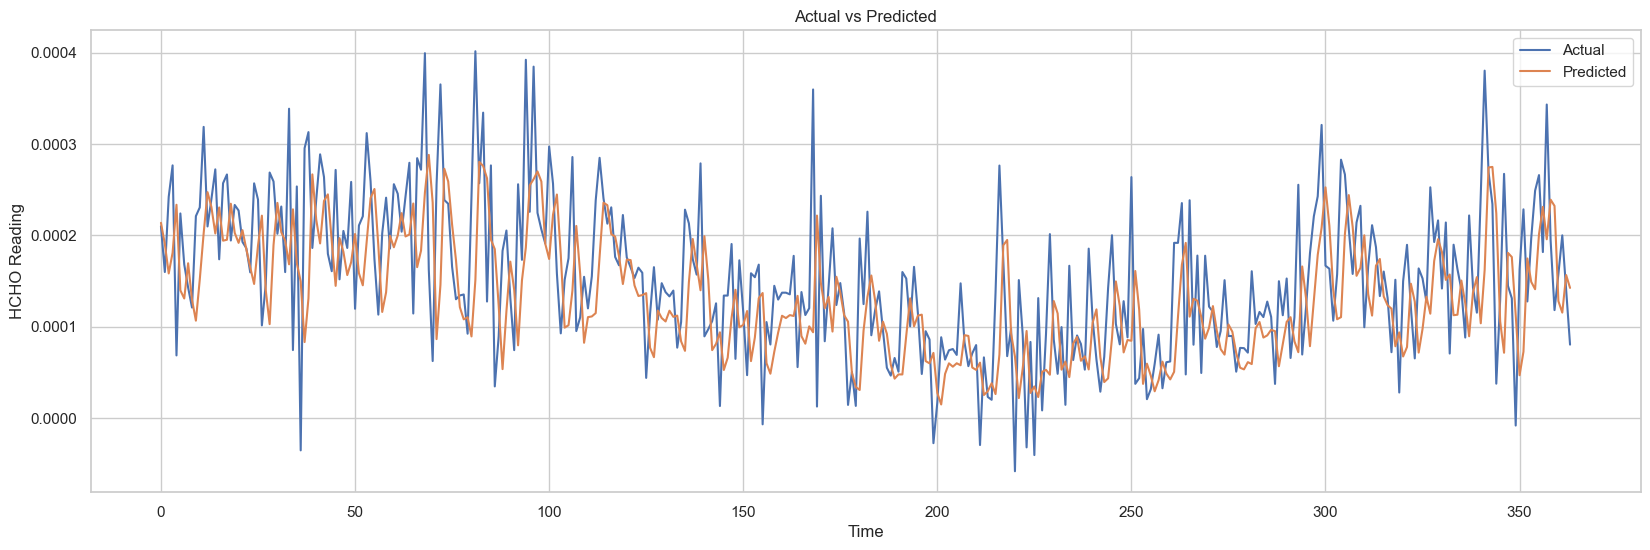

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import RMSprop

# Assuming 'data' is your DataFrame and you've loaded it successfully

data = pd.read_csv(r"..\processed data\temp\colombo_fomaldehyde.csv")
data.drop(columns=['Location','Next_Date'], inplace=True)

# Preprocessing
scaler = MinMaxScaler()
data['HCHO_reading'] = scaler.fit_transform(data['HCHO_reading'].values.reshape(-1, 1))

# Test size can be adjusted based on your needs (e.g., 0.2 for 20% test data)
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)

# # Define function to create sequences for RNN
# def create_sequences(data, seq_length):
#     X, y = [], []
#     for i in range(len(data) - seq_length):
#         X.append(data[i:(i + seq_length)])
#         y.append(data[i + seq_length, -1])  # Assuming target is the last column
#     return np.array(X), np.array(y)

sequence_length = 2  # Adjust sequence length as necessary

# Define function to create sequences of data
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length)])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Create sequences for training and testing data
X_train, y_train = create_sequences(train_data['HCHO_reading'].values, sequence_length)
X_test, y_test = create_sequences(test_data['HCHO_reading'].values, sequence_length)

# Define the model
model = Sequential([
    Bidirectional(LSTM(units=500, return_sequences=True), input_shape=(X_train.shape[1], 1)),
    Dropout(0.5),
#     Bidirectional(LSTM(units=400, return_sequences=True)),
#     Dropout(0.2),
#     Bidirectional(LSTM(units=200, return_sequences=True)),
#     Dropout(0.2),
    Bidirectional(LSTM(units=100, return_sequences=True)),  # New Bidirectional LSTM layer
    Dropout(0.2),  
    Bidirectional(LSTM(units=50)),  
    Dropout(0.2),  
    Dense(units=1)
])

optimizer = RMSprop(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_squared_error'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=20, validation_split=0.2
                    , callbacks=[EarlyStopping(patience=10)]
                   )

# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Inverse transform predictions
    train_predictions = scaler.inverse_transform(train_predictions)
    test_predictions = scaler.inverse_transform(test_predictions)
    y_train_inv = scaler.inverse_transform(y_train.reshape(-1, 1))
    y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Calculate evaluation metrics
    train_mae = mean_absolute_error(y_train_inv, train_predictions)
    test_mae = mean_absolute_error(y_test_inv, test_predictions)

    train_mse = mean_squared_error(y_train_inv, train_predictions)
    test_mse = mean_squared_error(y_test_inv, test_predictions)

    train_r2 = r2_score(y_train_inv, train_predictions)
    test_r2 = r2_score(y_test_inv, test_predictions)

    print("Training MAE:", train_mae)
    print("Testing MAE:", test_mae)
    print("Training MSE:", train_mse)
    print("Testing MSE:", test_mse)
    print("Training R2 Score:", train_r2)
    print("Testing R2 Score:", test_r2)

    # Plot actual vs predicted
    plt.figure(figsize=(20, 6))
    plt.plot(y_test_inv, label='Actual')
    plt.plot(test_predictions, label='Predicted')
    plt.xlabel('Time')
    plt.ylabel('HCHO Reading')
    plt.title('Actual vs Predicted')
    plt.legend()
    plt.show()

evaluate_model(model, X_train, y_train, X_test, y_test)


<div style="border-bottom: 2px solid black;"></div>

# 2 Monaragala

In [6]:
data = pd.read_csv(r"..\processed data\temp\monaragala_fomaldehyde.csv")
data.drop(columns=['Location','Next_Date'],inplace=True)
data.rename(columns={'Current_Date': 'ds', 'HCHO_reading': 'y'}, inplace=True)
data['ds'] = pd.to_datetime(data['ds'])

# Test size can be adjusted based on your needs (e.g., 0.2 for 20% test data)
train, test = train_test_split(data, test_size=0.1, shuffle=False)

In [11]:
covid_holidays = pd.DataFrame({
    'holiday': 'covid_19',
    'ds': pd.to_datetime(['2020-03-01', '2022-03-01']),
    #'lower_window': 0,
    #'upper_window': 1,
})

# Create the model (data argument removed)
model = Prophet( changepoint_prior_scale=0.3,  # More flexible trend
                 seasonality_prior_scale=5,
                 holidays=covid_holidays
               )

# Fit the model on the training data
model.fit(train)

future = model.make_future_dataframe(periods=len(test))
forecast = model.predict(future)

r2=r2_score(test['y'], forecast[forecast['ds'].isin(test['ds'])]['yhat'])
mse=mean_squared_error(test['y'], forecast[forecast['ds'].isin(test['ds'])]['yhat'])
print(r2)
print(mse)

09:17:41 - cmdstanpy - INFO - Chain [1] start processing
09:17:41 - cmdstanpy - INFO - Chain [1] done processing


0.12201427194498327
6.626667264429994e-09


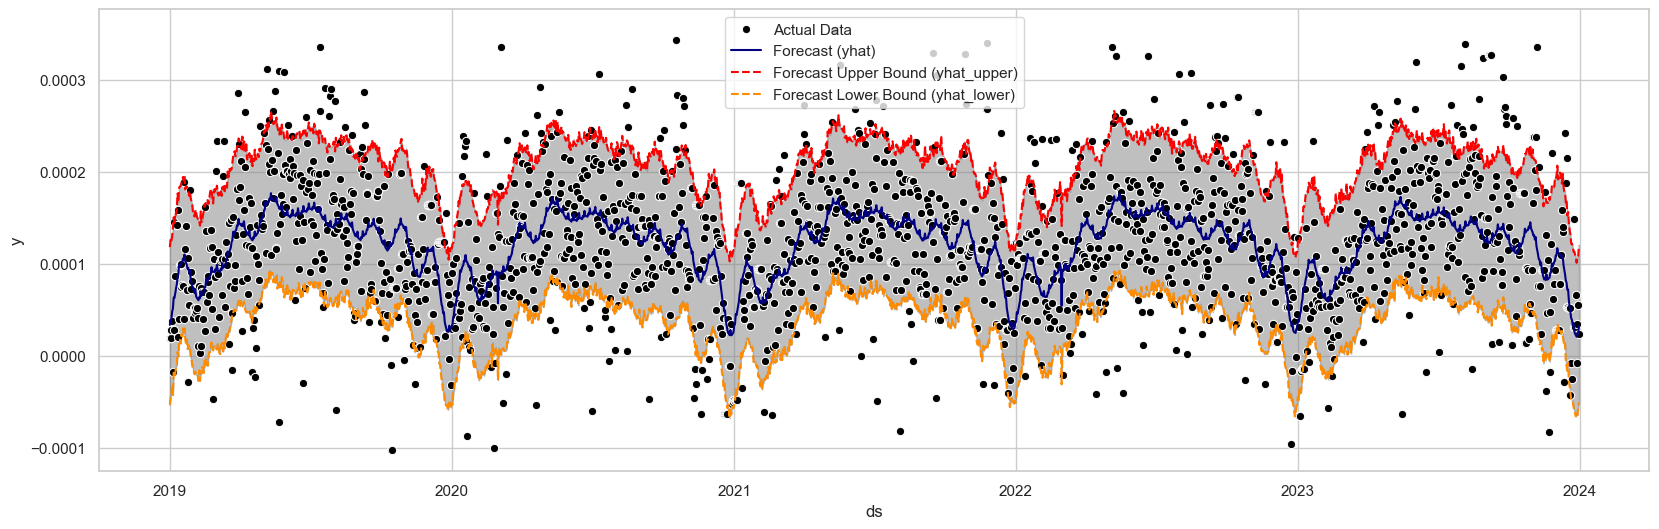

In [12]:
plt.figure(figsize=(20, 6))

# Plot actual data
sns.lineplot(data=data, x='ds', y='y', label='Actual Data', color='black', marker='o', linestyle='None')

# Plot yhat - forecast
sns.lineplot(data=forecast, x='ds', y='yhat', label='Forecast (yhat)', color='navy')

# Plot yhat_upper
sns.lineplot(data=forecast, x='ds', y='yhat_upper', label='Forecast Upper Bound (yhat_upper)', color='red', linestyle='--')

# Plot yhat_lower
sns.lineplot(data=forecast, x='ds', y='yhat_lower', label='Forecast Lower Bound (yhat_lower)', color='darkorange', linestyle='--')

plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='grey', alpha=0.5, label='Confidence_interval')

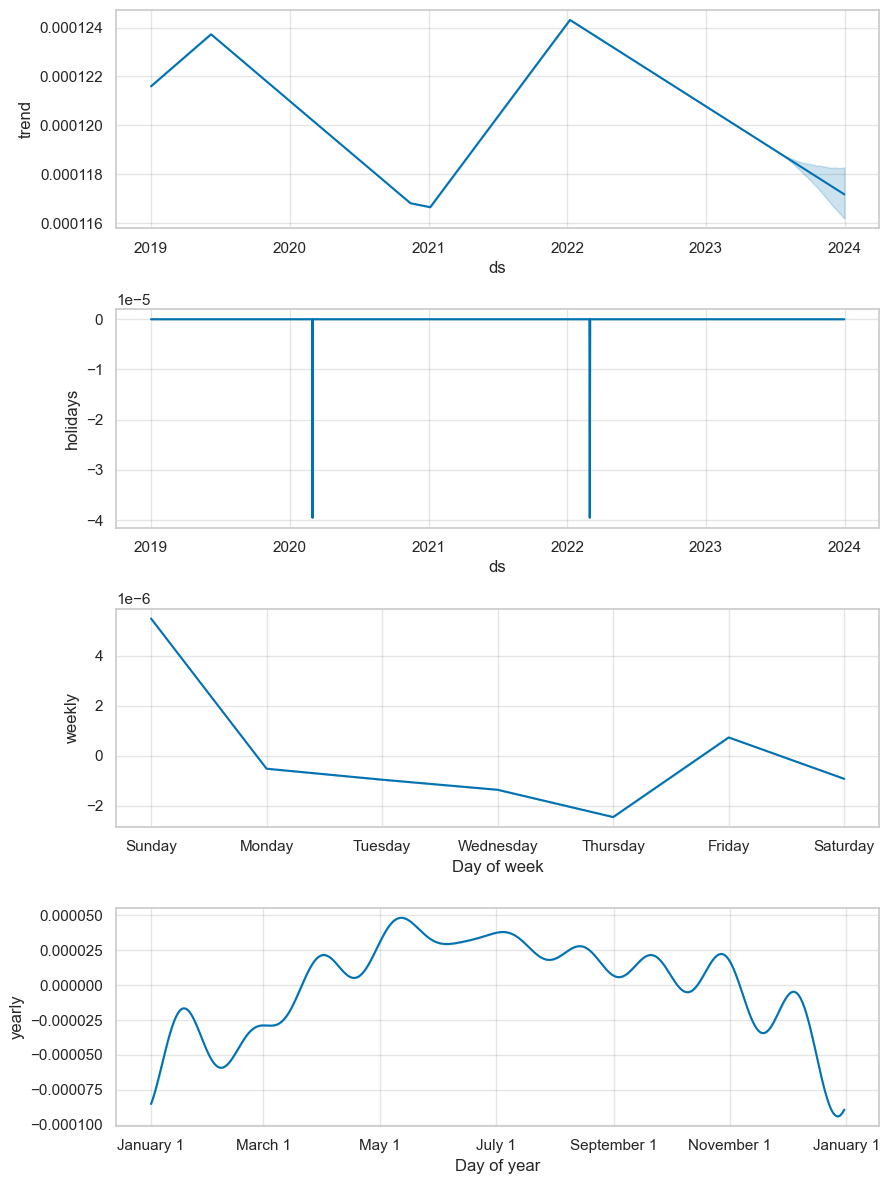

In [13]:
# Plot the forecast components
fig2 = model.plot_components(forecast)

Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1014
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0267
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0272
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0267
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0264
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0251
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0255
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0259
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0252
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0245
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0260 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0218  
Train Loss: 0.024677570909261703
Test Loss: 0.02350783534348011
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


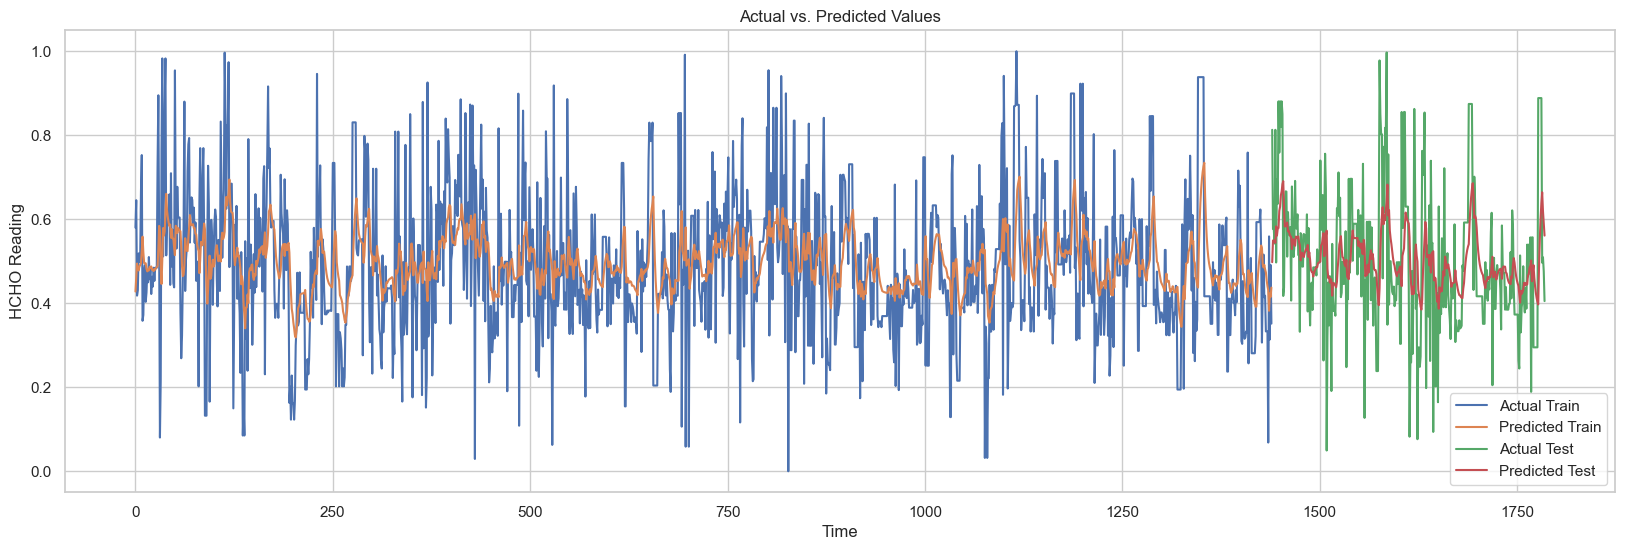

Train MSE: 0.02467757077617331
Test MSE: 0.02324157048405497
Train R2 Score: 0.15621212991084388
Test R2 Score: 0.18344446784523594


In [105]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load dataset

data = pd.read_csv(r"..\processed data\temp\nuwara_eliya_fomaldehyde.csv")
data.drop(columns=['Location','Next_Date'],inplace=True)

# Preprocessing
scaler = MinMaxScaler()
data['HCHO_reading'] = scaler.fit_transform(data['HCHO_reading'].values.reshape(-1, 1))

# Test size can be adjusted based on your needs (e.g., 0.2 for 20% test data)
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)

# Define function to create sequences of data
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length)])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Choose sequence length (number of time steps to consider)
seq_length =20

# Create sequences for training
X_train, y_train = create_sequences(train_data['HCHO_reading'].values, seq_length)
X_test, y_test = create_sequences(test_data['HCHO_reading'].values, seq_length)

# Define the LSTM model
model = Sequential([
    LSTM(units=50, input_shape=(X_train.shape[1], 1)),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
train_loss = model.evaluate(X_train, y_train)
test_loss = model.evaluate(X_test, y_test)

print(f'Train Loss: {train_loss}')
print(f'Test Loss: {test_loss}')


y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

plt.figure(figsize=(20, 6))
plt.plot(np.arange(len(y_train)), y_train, label='Actual Train')
plt.plot(np.arange(len(y_train_pred)), y_train_pred, label='Predicted Train')
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, label='Actual Test')
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test_pred)), y_test_pred, label='Predicted Test')
plt.xlabel('Time')
plt.ylabel('HCHO Reading')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()


# Calculate Mean Squared Error (MSE)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')

# Calculate R2 Score
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Train R2 Score: {train_r2}')
print(f'Test R2 Score: {test_r2}')


<div style="border-bottom: 2px solid black;"></div>

# 3 Matara

In [49]:
data = pd.read_csv(r"..\processed data\temp\matara_fomaldehyde.csv")
data.drop(columns=['Location','Next_Date'],inplace=True)
data.rename(columns={'Current_Date': 'ds', 'HCHO_reading': 'y'}, inplace=True)
data['ds'] = pd.to_datetime(data['ds'])

# Test size can be adjusted based on your needs (e.g., 0.2 for 20% test data)
train, test = train_test_split(data, test_size=0.1, shuffle=False)

In [50]:
covid_holidays = pd.DataFrame({
    'holiday': 'covid_19',
    'ds': pd.to_datetime(['2020-03-01', '2022-03-01']),
    #'lower_window': 0,
    #'upper_window': 1,
})

# Create the model (data argument removed)
model = Prophet( changepoint_prior_scale=0.35,  # More flexible trend
                 seasonality_prior_scale=5,
                 holidays=covid_holidays
               )

# Fit the model on the training data
model.fit(train)

future = model.make_future_dataframe(periods=len(test))
forecast = model.predict(future)

r2=r2_score(test['y'], forecast[forecast['ds'].isin(test['ds'])]['yhat'])
mse=mean_squared_error(test['y'], forecast[forecast['ds'].isin(test['ds'])]['yhat'])
print(r2)
print(mse)

14:04:34 - cmdstanpy - INFO - Chain [1] start processing
14:04:34 - cmdstanpy - INFO - Chain [1] done processing


-0.08856525370499613
4.987161424116864e-09


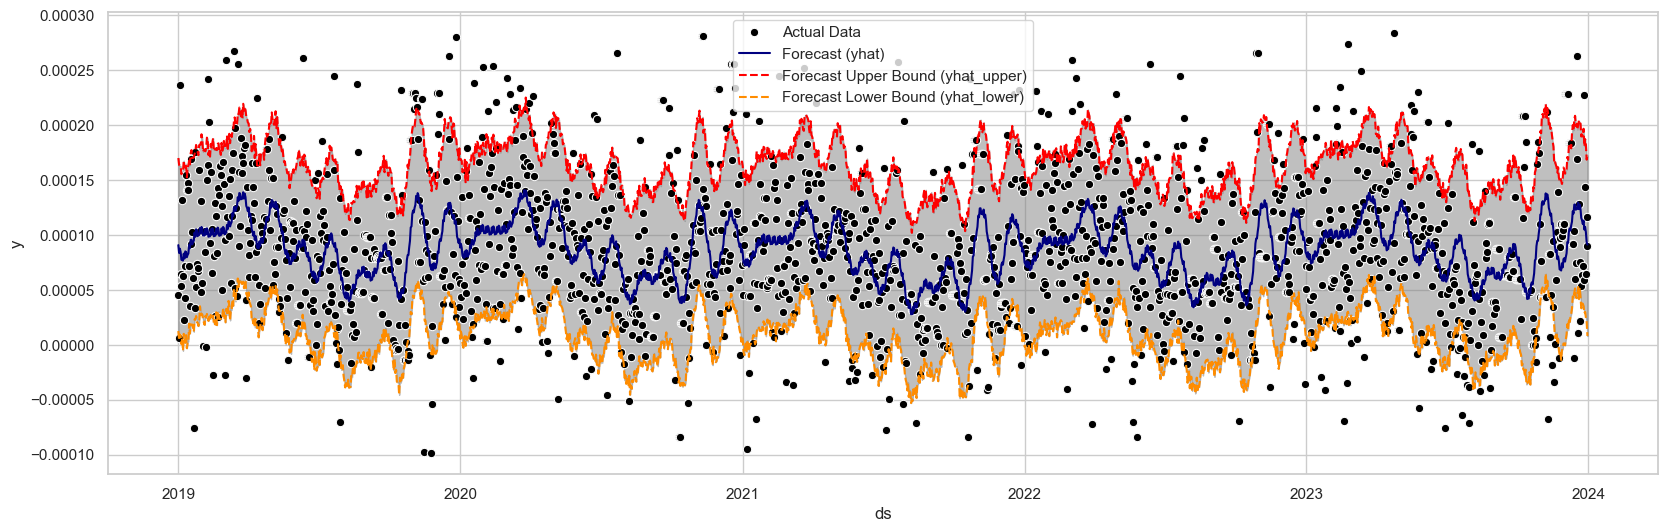

In [51]:
plt.figure(figsize=(20, 6))

# Plot actual data
sns.lineplot(data=data, x='ds', y='y', label='Actual Data', color='black', marker='o', linestyle='None')

# Plot yhat - forecast
sns.lineplot(data=forecast, x='ds', y='yhat', label='Forecast (yhat)', color='navy')

# Plot yhat_upper
sns.lineplot(data=forecast, x='ds', y='yhat_upper', label='Forecast Upper Bound (yhat_upper)', color='red', linestyle='--')

# Plot yhat_lower
sns.lineplot(data=forecast, x='ds', y='yhat_lower', label='Forecast Lower Bound (yhat_lower)', color='darkorange', linestyle='--')

plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='grey', alpha=0.5, label='Confidence_interval')

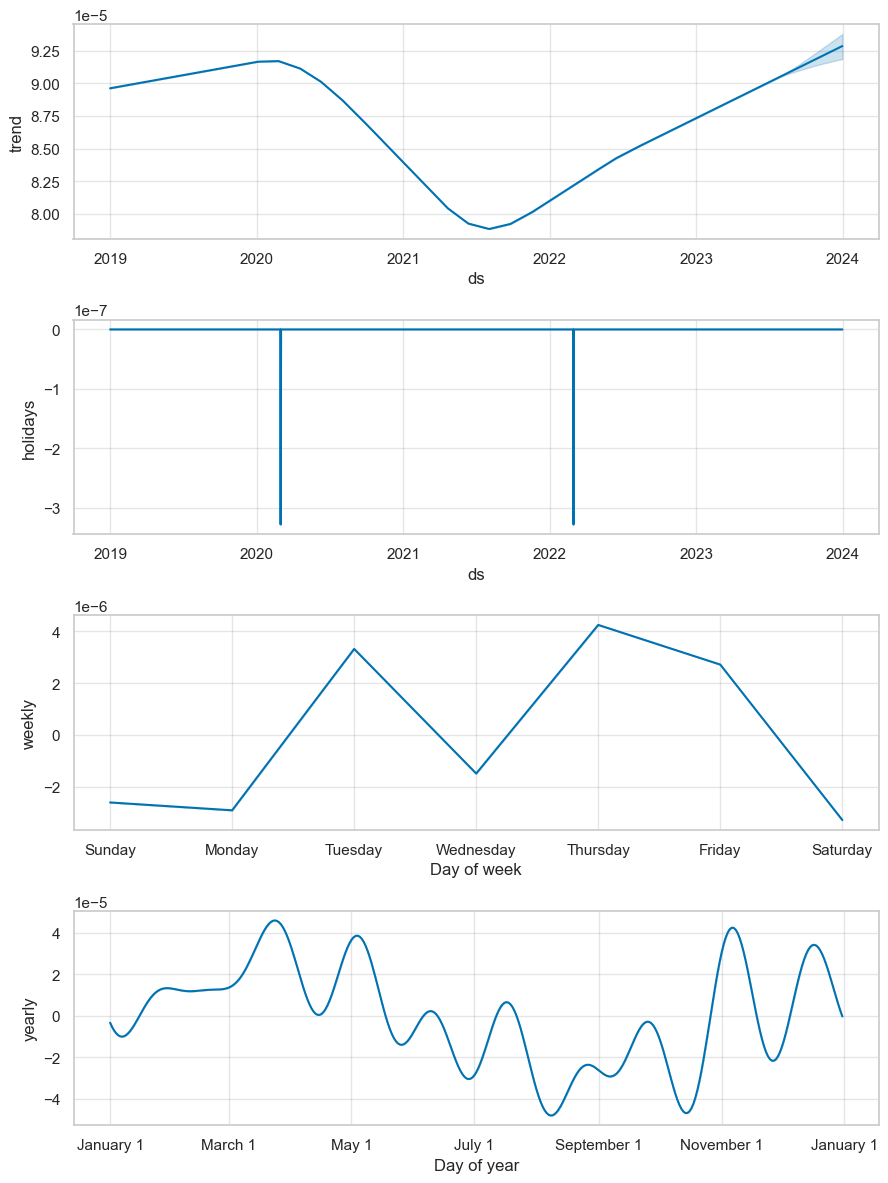

In [52]:
# Plot the forecast components
fig2 = model.plot_components(forecast)

Epoch 1/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1428
Epoch 2/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0279
Epoch 3/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0253
Epoch 4/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0242
Epoch 5/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0257
Epoch 6/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0251
Epoch 7/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0252
Epoch 8/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0258
Epoch 9/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0253
Epoch 10/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0238
Epoch 11/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0251
Epoch 12/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0246
Epoch 13/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0240
Epoch 14/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0266
Epoch 15/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0260
Epoc

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0268
Epoch 83/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0257
Epoch 84/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0260
Epoch 85/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0248
Epoch 86/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0233
Epoch 87/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0233
Epoch 88/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0232
Epoch 89/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0258
Epoch 90/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0252
Epoch 91/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0266
Epoch 92/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0253
Epoch 93/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0259
Epoch 94/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0240
Epoch 95/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0263
Epoch 96/150
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0239
Epoch 97

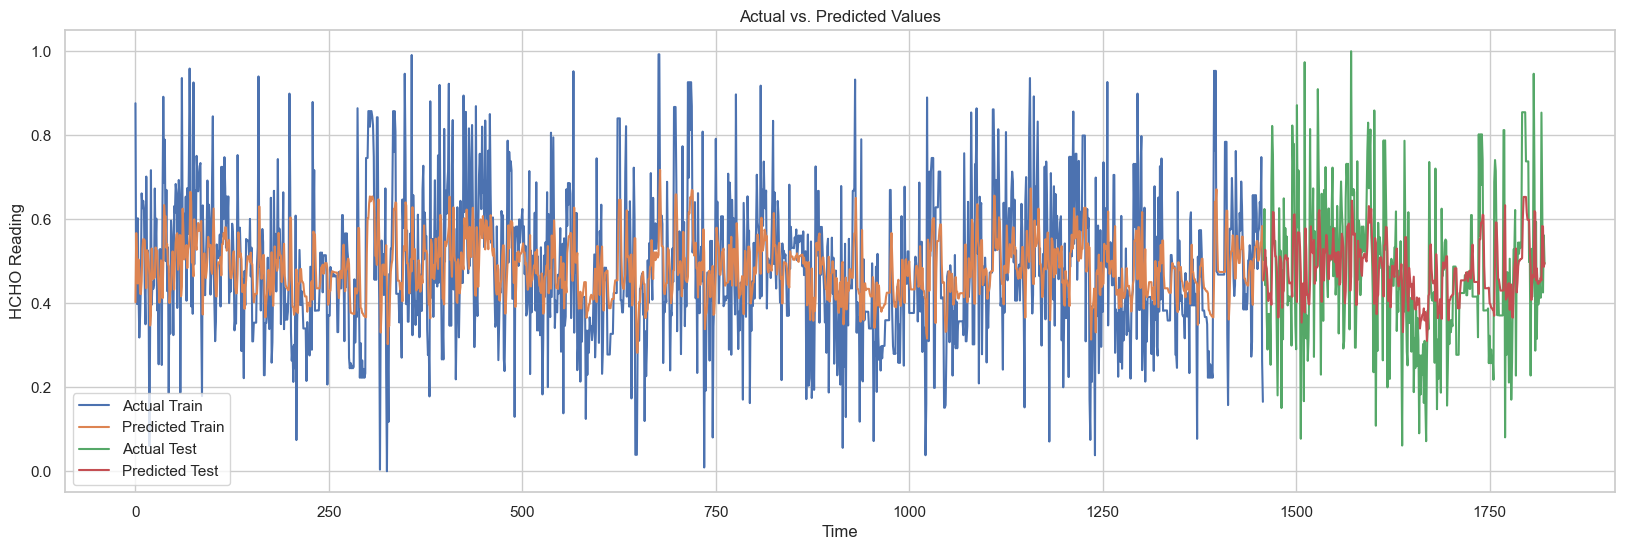

Train MSE: 0.024856562250711048
Test MSE: 0.026158455923225105
Train R2 Score: 0.15297430622540065
Test R2 Score: 0.16970583586094468


In [60]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load dataset

data = pd.read_csv(r"..\processed data\temp\matara_fomaldehyde.csv")
data.drop(columns=['Location','Next_Date'],inplace=True)

# Preprocessing
scaler = MinMaxScaler()
data['HCHO_reading'] = scaler.fit_transform(data['HCHO_reading'].values.reshape(-1, 1))

# Test size can be adjusted based on your needs (e.g., 0.2 for 20% test data)
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)

# Define function to create sequences of data
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length)])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Choose sequence length (number of time steps to consider)
seq_length =2

# Create sequences for training
X_train, y_train = create_sequences(train_data['HCHO_reading'].values, seq_length)
X_test, y_test = create_sequences(test_data['HCHO_reading'].values, seq_length)

# Define the LSTM model
model = Sequential([
    LSTM(units=100, input_shape=(X_train.shape[1], 1)),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=150, batch_size=32)

# Evaluate the model
train_loss = model.evaluate(X_train, y_train)
test_loss = model.evaluate(X_test, y_test)

print(f'Train Loss: {train_loss}')
print(f'Test Loss: {test_loss}')


y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

plt.figure(figsize=(20, 6))
plt.plot(np.arange(len(y_train)), y_train, label='Actual Train')
plt.plot(np.arange(len(y_train_pred)), y_train_pred, label='Predicted Train')
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, label='Actual Test')
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test_pred)), y_test_pred, label='Predicted Test')
plt.xlabel('Time')
plt.ylabel('HCHO Reading')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()


# Calculate Mean Squared Error (MSE)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')

# Calculate R2 Score
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Train R2 Score: {train_r2}')
print(f'Test R2 Score: {test_r2}')


Epoch 1/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0587 - val_loss: 0.0249
Epoch 2/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0291 - val_loss: 0.0234
Epoch 3/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0295 - val_loss: 0.0227
Epoch 4/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0277 - val_loss: 0.0226
Epoch 5/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0294 - val_loss: 0.0221
Epoch 6/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0305 - val_loss: 0.0220
Epoch 7/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0277 - val_loss: 0.0217
Epoch 8/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0263 - val_loss: 0.0222
Epoch 9/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0272 - val_loss: 0.0214
Epoch 10/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0270 - val_loss: 0.0218
Epoch 11/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0275 - val_loss: 0.0211
Epoch 12/100
131/131 ━━━━━━━━━━━━━━━━━━━━

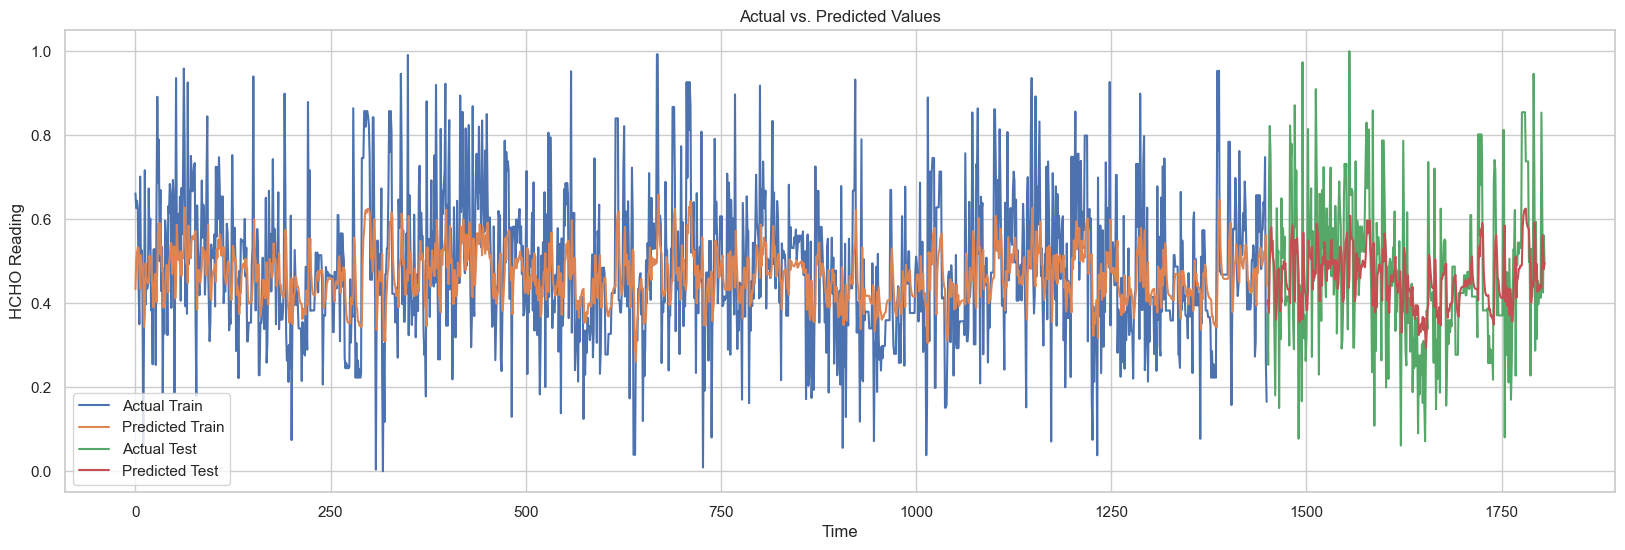

Train MSE: 0.025168924492577027
Test MSE: 0.026909061734420425
Train R2 Score: 0.14254645924100895
Test R2 Score: 0.157099804886352


In [57]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
data = pd.read_csv(r"..\processed data\temp\matara_fomaldehyde.csv")
data.drop(columns=['Location', 'Next_Date'], inplace=True)

# Preprocessing
scaler = MinMaxScaler()
data['HCHO_reading'] = scaler.fit_transform(data['HCHO_reading'].values.reshape(-1, 1))

# Train-test split
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)

# Create sequences function
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length)])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Choose sequence length
seq_length = 10

# Create sequences for training and testing
X_train, y_train = create_sequences(train_data['HCHO_reading'].values, seq_length)
X_test, y_test = create_sequences(test_data['HCHO_reading'].values, seq_length)

# Define the LSTM model
model = Sequential([
    LSTM(units=150, input_shape=(X_train.shape[1], 1)),
    Dropout(0.3),  # Adding dropout for regularization
    Dense(units=1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.1, callbacks=[early_stopping])

# Evaluate the model
train_loss = model.evaluate(X_train, y_train)
test_loss = model.evaluate(X_test, y_test)

print(f'Train Loss: {train_loss}')
print(f'Test Loss: {test_loss}')

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Plotting
plt.figure(figsize=(20, 6))
plt.plot(np.arange(len(y_train)), y_train, label='Actual Train')
plt.plot(np.arange(len(y_train_pred)), y_train_pred, label='Predicted Train')
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, label='Actual Test')
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test_pred)), y_test_pred, label='Predicted Test')
plt.xlabel('Time')
plt.ylabel('HCHO Reading')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

# Metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')
print(f'Train R2 Score: {train_r2}')
print(f'Test R2 Score: {test_r2}')


<div style="border-bottom: 2px solid black;"></div>

# 4 Nuwara Eliya

In [226]:
data = pd.read_csv(r"..\processed data\temp\nuwara_eliya_fomaldehyde.csv")
data.drop(columns=['Location','Next_Date'],inplace=True)
data.rename(columns={'Current_Date': 'ds', 'HCHO_reading': 'y'}, inplace=True)
data['ds'] = pd.to_datetime(data['ds'])

# Test size can be adjusted based on your needs (e.g., 0.2 for 20% test data)
train, test = train_test_split(data, test_size=0.1, shuffle=False)

In [227]:
covid_holidays = pd.DataFrame({
    'holiday': 'covid_19',
    'ds': pd.to_datetime(['2020-03-01', '2022-03-01']),
    #'lower_window': 0,
    #'upper_window': 1,
})

# Create the model (data argument removed)
model = Prophet( changepoint_prior_scale=0.2,  # More flexible trend
                 seasonality_prior_scale=5,
                 holidays=covid_holidays
               )

# Fit the model on the training data
model.fit(train)

future = model.make_future_dataframe(periods=len(test))
forecast = model.predict(future)

r2=r2_score(test['y'], forecast[forecast['ds'].isin(test['ds'])]['yhat'])
mse=mean_squared_error(test['y'], forecast[forecast['ds'].isin(test['ds'])]['yhat'])
print(r2)
print(mse)

23:44:38 - cmdstanpy - INFO - Chain [1] start processing
23:44:38 - cmdstanpy - INFO - Chain [1] done processing


0.016700678603181918
4.4295444982328785e-09


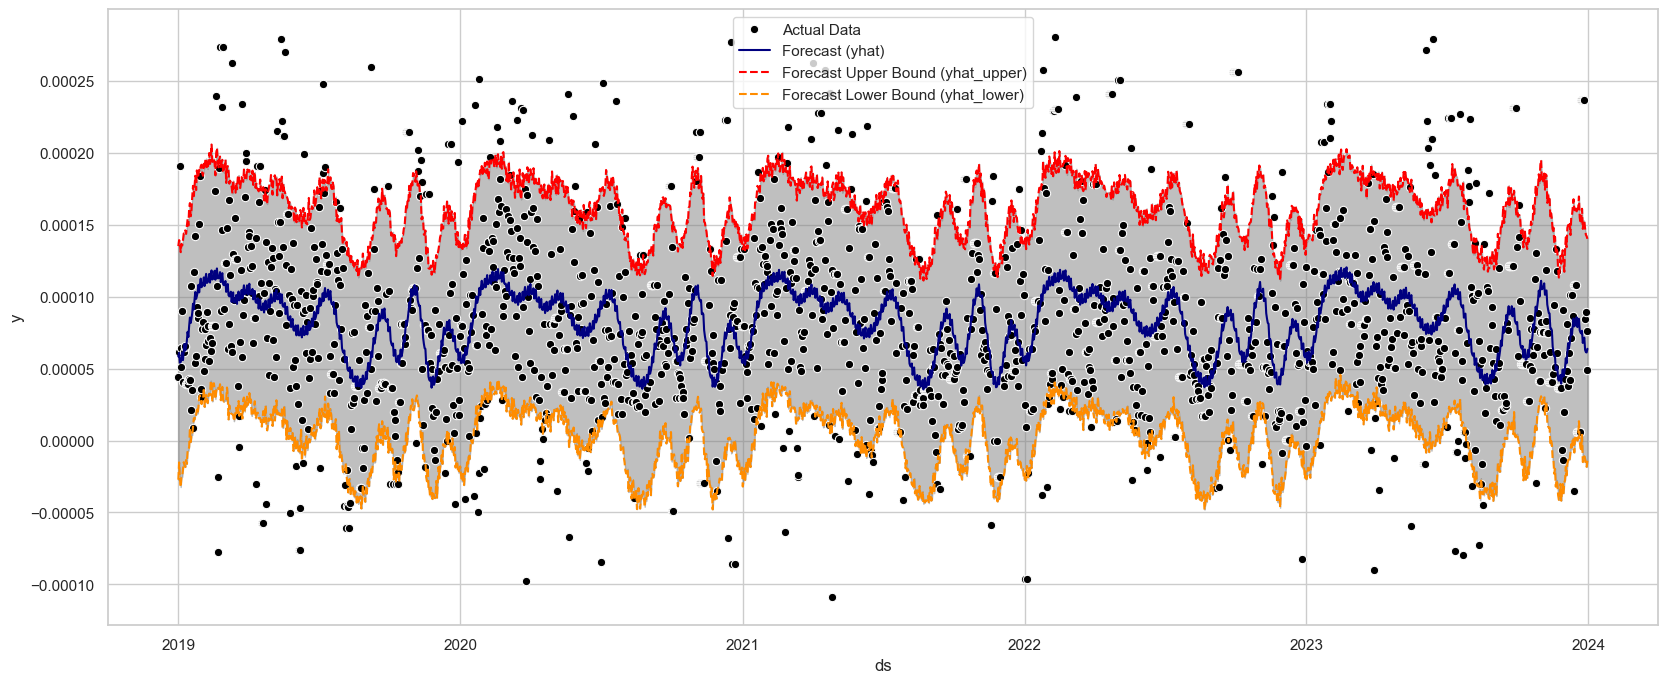

In [228]:
plt.figure(figsize=(20, 8))

# Plot actual data
sns.lineplot(data=data, x='ds', y='y', label='Actual Data', color='black', marker='o', linestyle='None')

# Plot yhat - forecast
sns.lineplot(data=forecast, x='ds', y='yhat', label='Forecast (yhat)', color='navy')

# Plot yhat_upper
sns.lineplot(data=forecast, x='ds', y='yhat_upper', label='Forecast Upper Bound (yhat_upper)', color='red', linestyle='--')

# Plot yhat_lower
sns.lineplot(data=forecast, x='ds', y='yhat_lower', label='Forecast Lower Bound (yhat_lower)', color='darkorange', linestyle='--')

plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='grey', alpha=0.5, label='Confidence_interval')

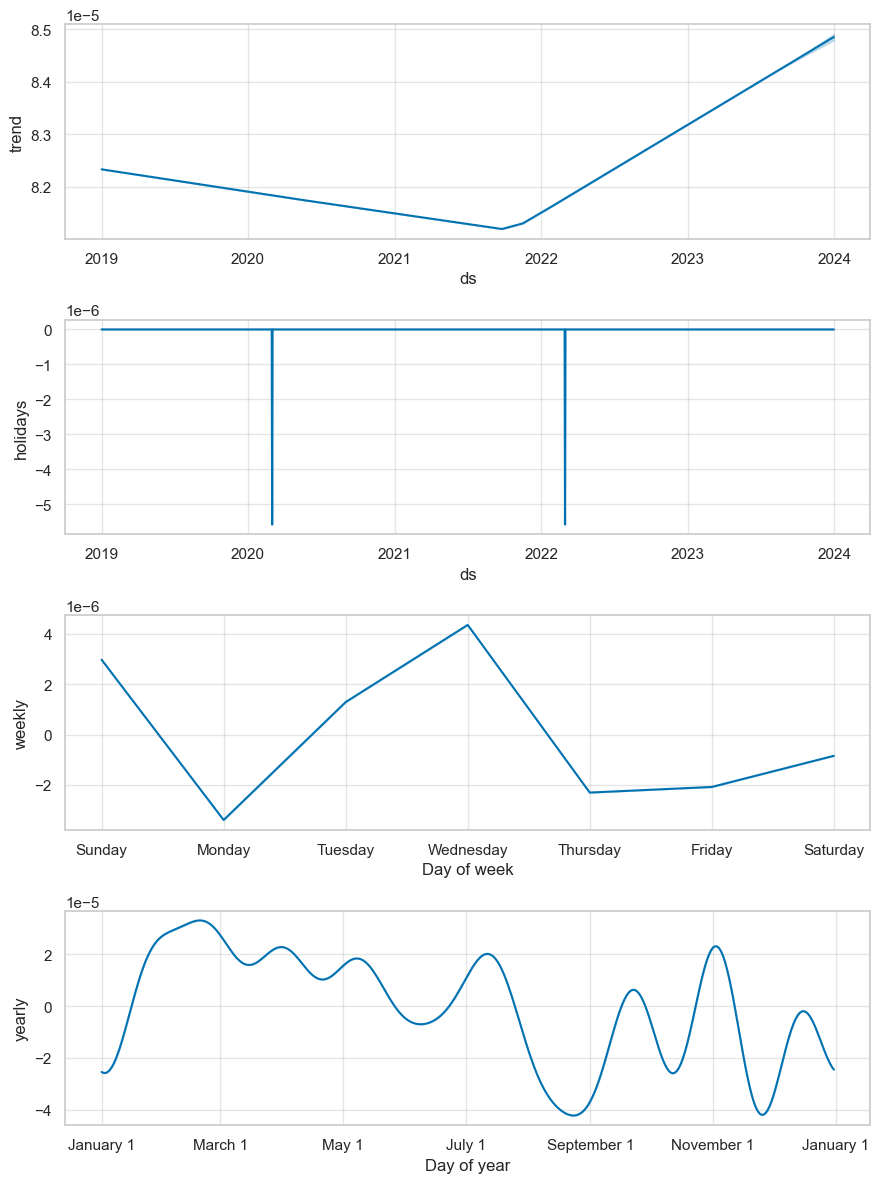

In [209]:
# Plot the forecast components
fig2 = model.plot_components(forecast)

Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0812
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0264
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0252
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0262
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0245
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0266
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0243
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0281
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0237
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0241
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0257 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0216  
Train Loss: 0.024106211960315704
Test Loss: 0.02274840511381626
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


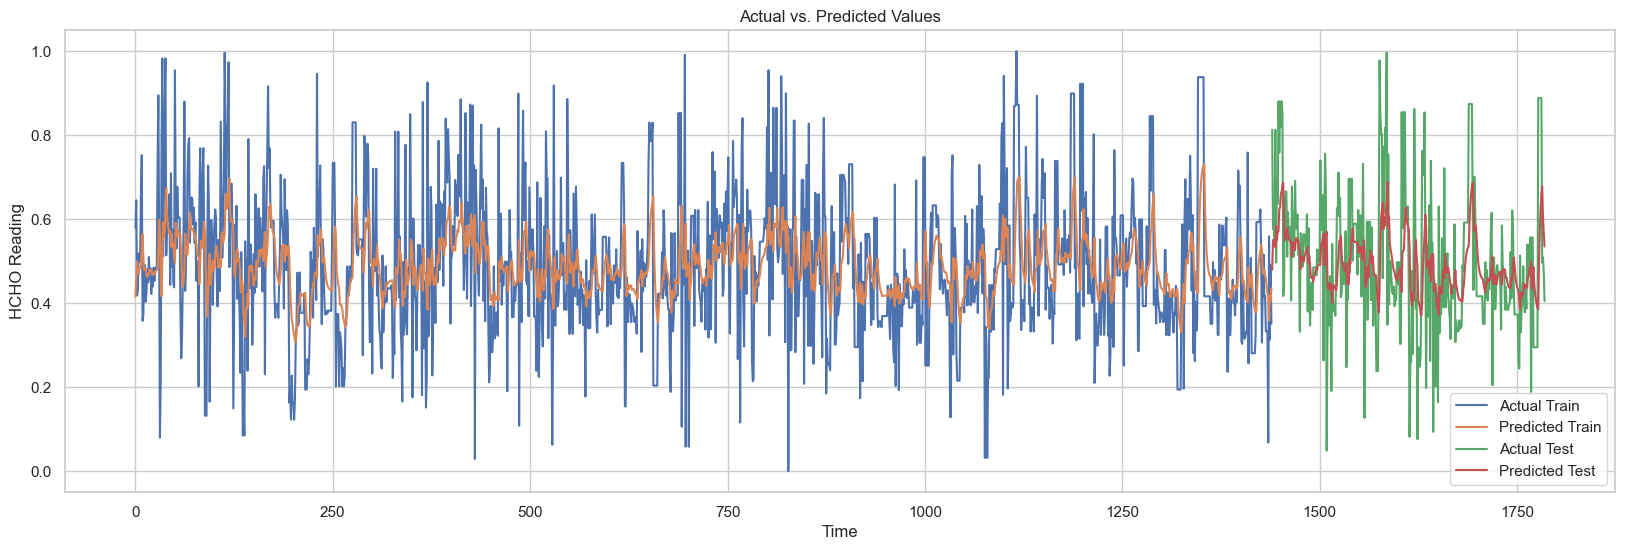

Train MSE: 0.024106211140242785
Test MSE: 0.022509788856923917
Train R2 Score: 0.17574834498766223
Test R2 Score: 0.20915444886278478


In [210]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load dataset

data = pd.read_csv(r"..\processed data\temp\nuwara_eliya_fomaldehyde.csv")
data.drop(columns=['Location','Next_Date'],inplace=True)

# Preprocessing
scaler = MinMaxScaler()
data['HCHO_reading'] = scaler.fit_transform(data['HCHO_reading'].values.reshape(-1, 1))

# Test size can be adjusted based on your needs (e.g., 0.2 for 20% test data)
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)

# Define function to create sequences of data
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length)])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Choose sequence length (number of time steps to consider)
seq_length =20

# Create sequences for training
X_train, y_train = create_sequences(train_data['HCHO_reading'].values, seq_length)
X_test, y_test = create_sequences(test_data['HCHO_reading'].values, seq_length)

# Define the LSTM model
model = Sequential([
    LSTM(units=50, input_shape=(X_train.shape[1], 1)),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
train_loss = model.evaluate(X_train, y_train)
test_loss = model.evaluate(X_test, y_test)

print(f'Train Loss: {train_loss}')
print(f'Test Loss: {test_loss}')


y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

plt.figure(figsize=(20, 6))
plt.plot(np.arange(len(y_train)), y_train, label='Actual Train')
plt.plot(np.arange(len(y_train_pred)), y_train_pred, label='Predicted Train')
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, label='Actual Test')
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test_pred)), y_test_pred, label='Predicted Test')
plt.xlabel('Time')
plt.ylabel('HCHO Reading')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()


# Calculate Mean Squared Error (MSE)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')

# Calculate R2 Score
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Train R2 Score: {train_r2}')
print(f'Test R2 Score: {test_r2}')


<div style="border-bottom: 2px solid black;"></div>

# 5 Kurunegala

In [229]:
data = pd.read_csv(r"..\processed data\temp\kurunegala_fomaldehyde.csv")
data.drop(columns=['Location','Next_Date'],inplace=True)
data.rename(columns={'Current_Date': 'ds', 'HCHO_reading': 'y'}, inplace=True)
data['ds'] = pd.to_datetime(data['ds'])

# Test size can be adjusted based on your needs (e.g., 0.2 for 20% test data)
train, test = train_test_split(data, test_size=0.1, shuffle=False)

In [230]:
covid_holidays = pd.DataFrame({
    'holiday': 'covid_19',
    'ds': pd.to_datetime(['2020-03-01', '2022-03-01']),
    #'lower_window': 0,
    #'upper_window': 1,
})

# Create the model (data argument removed)
model = Prophet( changepoint_prior_scale=0.1,  # More flexible trend
                 seasonality_prior_scale=5,
                 holidays=covid_holidays
               )

# Fit the model on the training data
model.fit(train)

future = model.make_future_dataframe(periods=len(test))
forecast = model.predict(future)

r2=r2_score(test['y'], forecast[forecast['ds'].isin(test['ds'])]['yhat'])
mse=mean_squared_error(test['y'], forecast[forecast['ds'].isin(test['ds'])]['yhat'])
print(r2)
print(mse)

23:46:48 - cmdstanpy - INFO - Chain [1] start processing
23:46:48 - cmdstanpy - INFO - Chain [1] done processing


-0.05713016893007272
4.695949296354587e-09


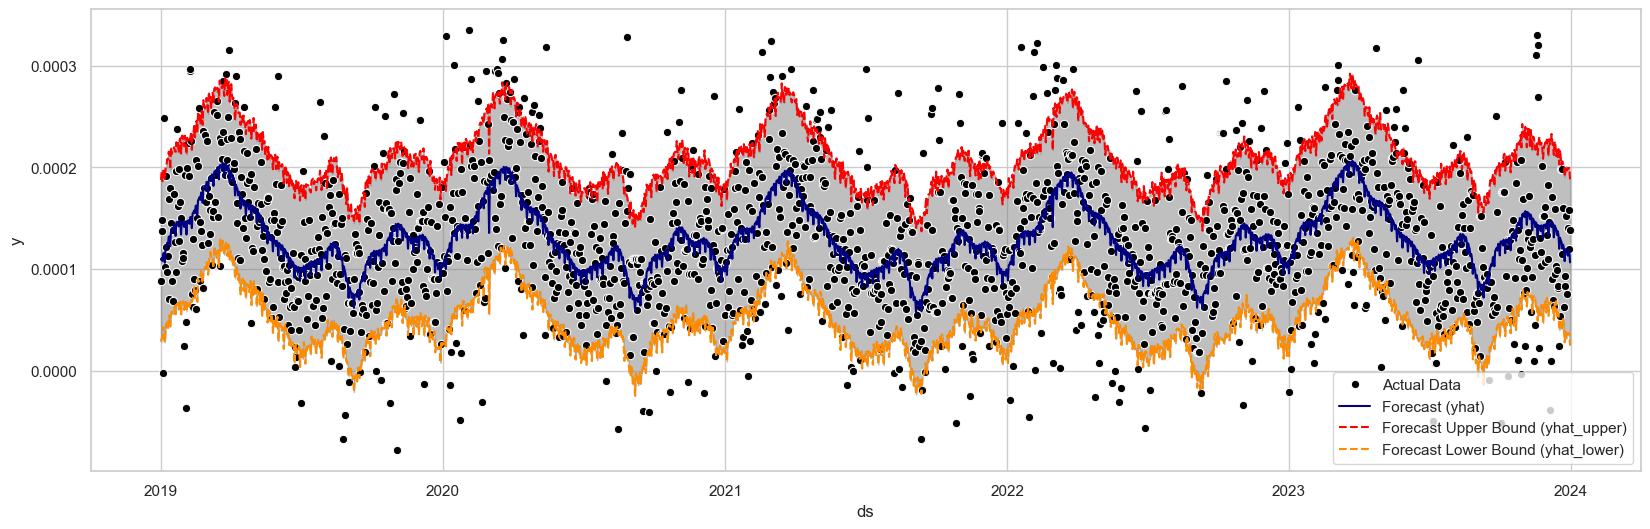

In [231]:
plt.figure(figsize=(20, 6))

# Plot actual data
sns.lineplot(data=data, x='ds', y='y', label='Actual Data', color='black', marker='o', linestyle='None')

# Plot yhat - forecast
sns.lineplot(data=forecast, x='ds', y='yhat', label='Forecast (yhat)', color='navy')

# Plot yhat_upper
sns.lineplot(data=forecast, x='ds', y='yhat_upper', label='Forecast Upper Bound (yhat_upper)', color='red', linestyle='--')

# Plot yhat_lower
sns.lineplot(data=forecast, x='ds', y='yhat_lower', label='Forecast Lower Bound (yhat_lower)', color='darkorange', linestyle='--')

plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='grey', alpha=0.5, label='Confidence_interval')

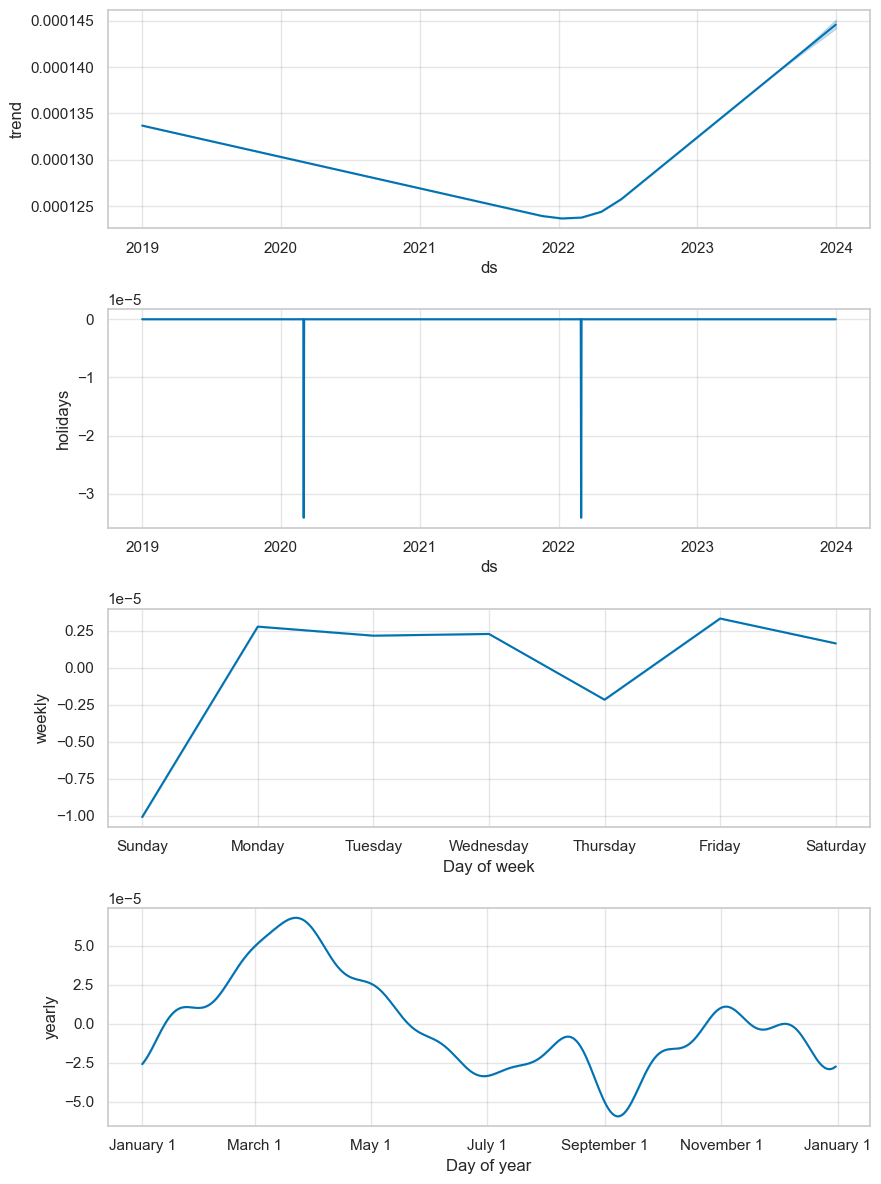

In [232]:
# Plot the forecast components
fig2 = model.plot_components(forecast)

Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0956
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0282
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0273
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0265
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0250
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0270
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0253
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0255
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0232
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0248
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0261 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0222  
Train Loss: 0.024574436247348785
Test Loss: 0.023482145741581917
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


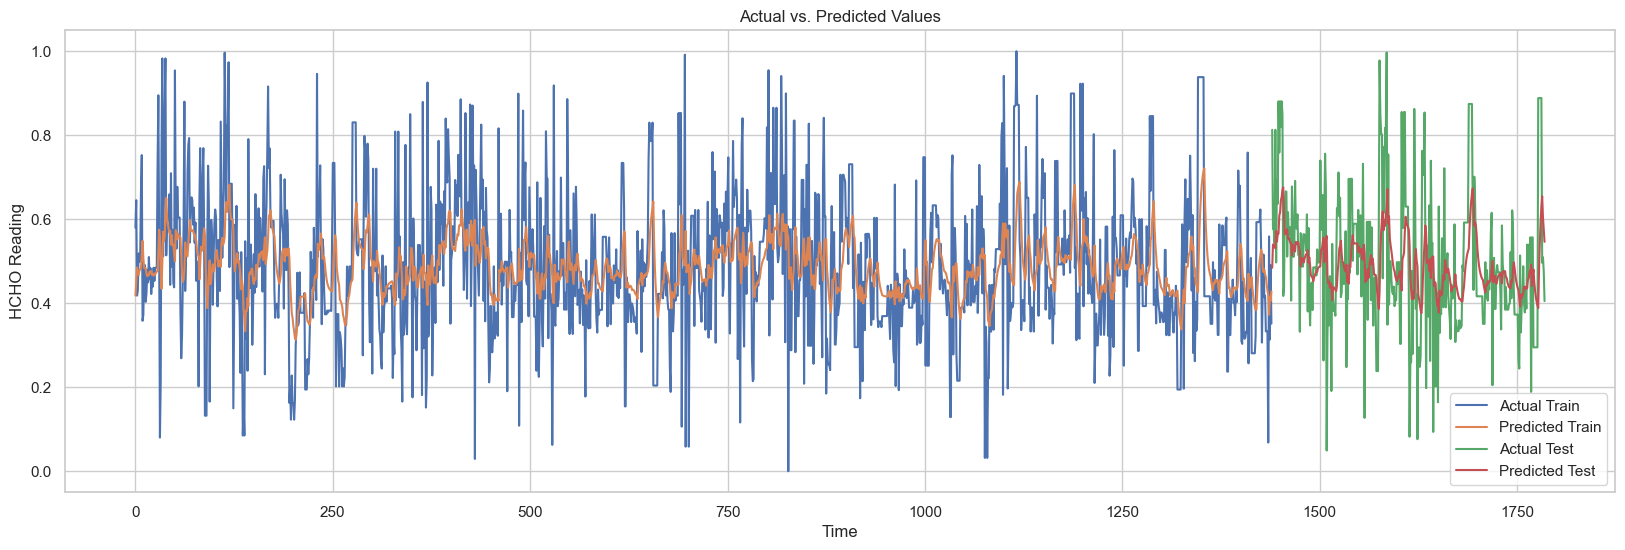

Train MSE: 0.02457443793875254
Test MSE: 0.0232155409198905
Train R2 Score: 0.15973849958526676
Test R2 Score: 0.1843589750913215


In [17]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load dataset

data = pd.read_csv(r"..\processed data\temp\nuwara_eliya_fomaldehyde.csv")
data.drop(columns=['Location','Next_Date'],inplace=True)

# Preprocessing
scaler = MinMaxScaler()
data['HCHO_reading'] = scaler.fit_transform(data['HCHO_reading'].values.reshape(-1, 1))

# Test size can be adjusted based on your needs (e.g., 0.2 for 20% test data)
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)

# Define function to create sequences of data
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length)])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Choose sequence length (number of time steps to consider)
seq_length =20

# Create sequences for training
X_train, y_train = create_sequences(train_data['HCHO_reading'].values, seq_length)
X_test, y_test = create_sequences(test_data['HCHO_reading'].values, seq_length)

# Define the LSTM model
model = Sequential([
    LSTM(units=50, input_shape=(X_train.shape[1], 1)),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
train_loss = model.evaluate(X_train, y_train)
test_loss = model.evaluate(X_test, y_test)

print(f'Train Loss: {train_loss}')
print(f'Test Loss: {test_loss}')


y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

plt.figure(figsize=(20, 6))
plt.plot(np.arange(len(y_train)), y_train, label='Actual Train')
plt.plot(np.arange(len(y_train_pred)), y_train_pred, label='Predicted Train')
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, label='Actual Test')
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test_pred)), y_test_pred, label='Predicted Test')
plt.xlabel('Time')
plt.ylabel('HCHO Reading')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()


# Calculate Mean Squared Error (MSE)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')

# Calculate R2 Score
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Train R2 Score: {train_r2}')
print(f'Test R2 Score: {test_r2}')


# XG

In [ ]:
pip install xgboost

In [ ]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load your data (replace with your data loading)
data = df.copy()
data.drop(columns=['Location','Next_Date'],inplace=True)

# # Feature engineering (replace with your specific features)
# data['year'] = pd.to_datetime(data['Current_Date']).dt.year
# data['month'] = pd.to_datetime(data['Current_Date']).dt.month
# data['day_of_week'] = pd.to_datetime(data['Current_Date']).dt.dayofweek

# # Define COVID period (replace with your actual dates)
# covid_start = pd.to_datetime('2020-03-15')
# covid_end = pd.to_datetime('2022-06-30')
# data['covid_period'] = (data['Current_Date'] >= covid_start) & (data['Current_Date'] <= covid_end)
#data.drop(columns=['Current_Date'],inplace=True)


#Split data
train, test = train_test_split(data, test_size=0.2,shuffle=False)

# XGBoost model definition
model = XGBRegressor()

# Train the model
model.fit(train['Current_Date'], train['HCHO_reading'])

# Make predictions
predictions = model.predict(test['Current_Date'])

# Evaluate the model (e.g., MSE)
mse = mean_squared_error(train['HCHO_reading'], predictions)
print("Mean Squared Error:", mse)

# Feature importance (optional)
feature_importance = model.feature_importances_
print("Feature Importance:", feature_importance)


In [ ]:


plt.figure(figsize=(20, 6))
plt.plot(test['Current_Date'], test['HCHO_reading'], label="test")
plt.plot(test['Current_Date'], predictions, label="forecast")
plt.title("HCHO_reading column visualization")
plt.xlabel("Date")
plt.ylabel("HCHO_reading")
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='blue', alpha=0.5)  # Scatter plot of actual vs predicted
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()


In [ ]:
//

# ARIAMA

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df[['HCHO_reading']])
print('ADF Statistic:', result[0])
print('p-value:', result[1])


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df[['HCHO_reading']])
plt.show()


In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

def is_stationary(timeseries):
    """
    Check for stationarity using the Dickey-Fuller test.

    Args:
        timeseries: The time series data to check.

    Returns:
        A tuple containing a boolean indicating stationarity and the p-value of the Dickey-Fuller test.
    """

    dftest = adfuller(timeseries)
    dfvalue = dftest[0]
    pvalue = dftest[1]
    # Print the results of the Dickey-Fuller test
    print(f"ADF Statistic ({dfvalue})")
    print(f"p-Value ({pvalue})")
    print("\n")
    return dfvalue < 0.05  # Reject the null hypothesis if p-value is less than significance level (0.05)

# Example usage
is_stationary(df['HCHO_reading'])


In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import acf, pacf
import matplotlib.pyplot as plt

def identify_arima_order(timeseries):
  """
  Identify ARIMA order (p, d, q) using ACF and PACF plots.

  Args:
      timeseries: The time series data.

  Returns:
      None (Plots the ACF and PACF)
  """
  # Check for stationarity (assuming you've already done this)
  # ... (Your stationarity check code)

  # Plot ACF and PACF
  fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))
  lag_acf = acf(timeseries, nlags=30)
  ax1.plot(lag_acf)
  ax1.axhline(y=0, color='red', linestyle='--', alpha=0.7)
  ax1.set_title("Autocorrelation Function (ACF)")

  lag_pacf = pacf(timeseries, nlags=30)
  ax2.plot(lag_pacf)
  ax2.axhline(y=0, color='red', linestyle='--', alpha=0.7)
  ax2.set_title("Partial Autocorrelation Function (PACF)")
  plt.tight_layout()
  plt.show()

# Example usage
identify_arima_order(df['HCHO_reading'])


In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt



# Fit ARIMA model
model = ARIMA(df['HCHO_reading'], order=(365, 0, 0))  # Example values for p, d, q
fitted_model = model.fit()

# Forecast
forecast = fitted_model.forecast(steps=365)

# Plot forecast
plt.figure(figsize=(20, 6))
plt.plot(df['HCHO_reading'], label='Original Data')
plt.plot( forecast, label='Forecast', color='red')
plt.legend()
plt.title("ARIMA Forecast")
plt.show()


C:\Users\janak\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\janak\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\janak\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\janak\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\janak\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximu

Test MSE: 0.020667376618661297
Test R2 Score: 0.2521238751253604


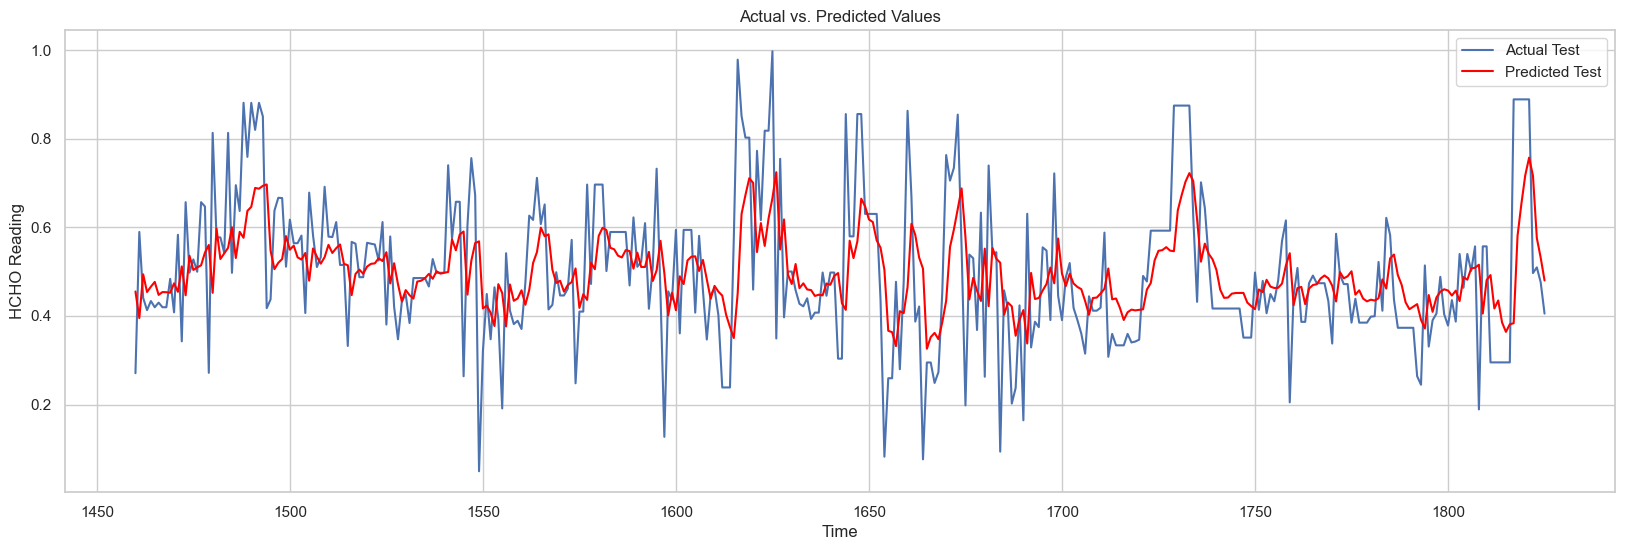

In [234]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
data = pd.read_csv(r"..\processed data\temp\nuwara_eliya_fomaldehyde.csv")
data.drop(columns=['Location', 'Next_Date'], inplace=True)

# Preprocessing
scaler = MinMaxScaler()
data['HCHO_reading'] = scaler.fit_transform(data['HCHO_reading'].values.reshape(-1, 1))

# Test size can be adjusted based on your needs (e.g., 0.2 for 20% test data)
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)

# Define ARIMA parameters
p = 5  # Autoregression (AR) order
d = 0  # Differencing (I) order
q = 1  # Moving Average (MA) order

# Train ARIMA model
model = ARIMA(train_data['HCHO_reading'], order=(p, d, q))
arima_model = model.fit()

# Forecast
history = train_data['HCHO_reading'].values.tolist()
predictions = []
for t in range(len(test_data)):
    model = ARIMA(history, order=(p, d, q))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_data['HCHO_reading'].iloc[t]
    history.append(obs)

# Evaluate the model
test_loss = mean_squared_error(test_data['HCHO_reading'], predictions)
test_r2 = r2_score(test_data['HCHO_reading'], predictions)

print(f'Test MSE: {test_loss}')
print(f'Test R2 Score: {test_r2}')

# Plotting
plt.figure(figsize=(20, 6))
plt.plot(test_data.index, test_data['HCHO_reading'], label='Actual Test')
plt.plot(test_data.index, predictions, color='red', label='Predicted Test')
plt.xlabel('Time')
plt.ylabel('HCHO Reading')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()


Train MSE: 0.023228999646206772
Test MSE: 0.02772461749118427


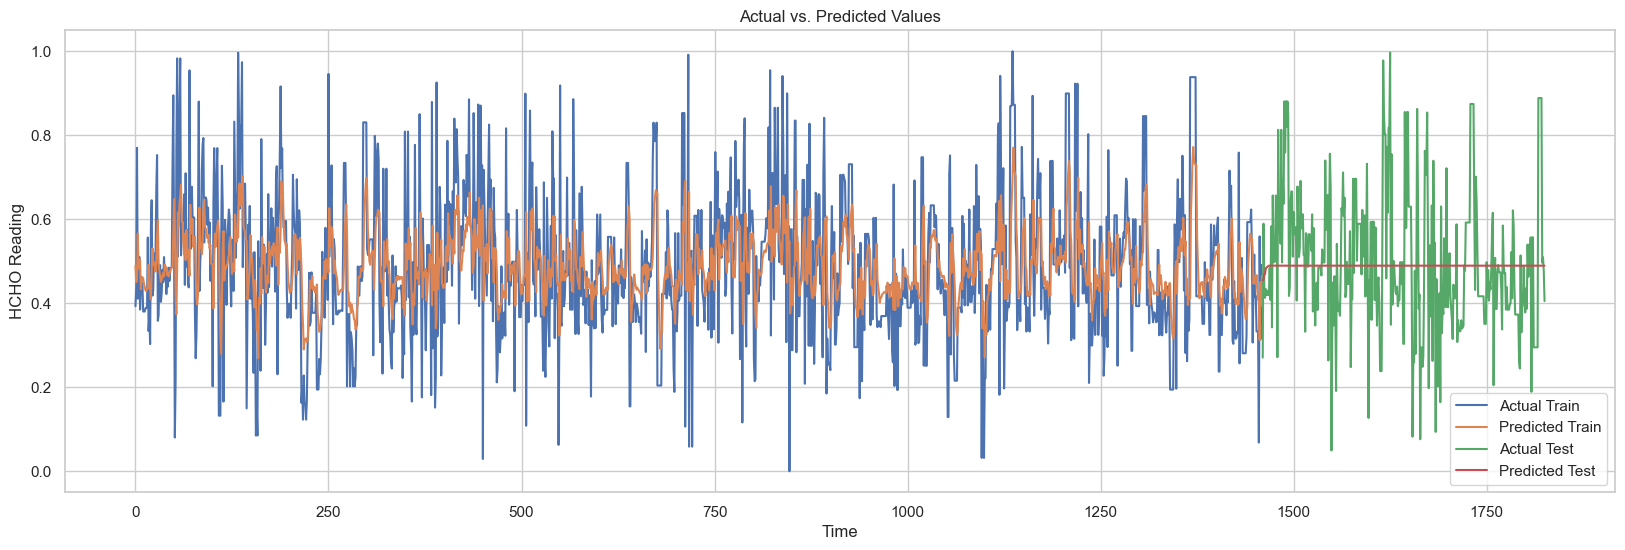

In [235]:
# Forecast
train_start = train_data.index[0]
train_end = train_data.index[-1]
test_start = test_data.index[0]
test_end = test_data.index[-1]

train_predictions = arima_model.get_prediction(start=train_start, end=train_end)
test_predictions = arima_model.get_prediction(start=test_start, end=test_end)

train_predictions_mean = train_predictions.predicted_mean
test_predictions_mean = test_predictions.predicted_mean

# Evaluate the model
train_loss = mean_squared_error(train_data['HCHO_reading'], train_predictions_mean)
test_loss = mean_squared_error(test_data['HCHO_reading'], test_predictions_mean)

print(f'Train MSE: {train_loss}')
print(f'Test MSE: {test_loss}')

# Plotting
plt.figure(figsize=(20, 6))
plt.plot(train_data.index, train_data['HCHO_reading'], label='Actual Train')
plt.plot(train_data.index, train_predictions_mean, label='Predicted Train')
plt.plot(test_data.index, test_data['HCHO_reading'], label='Actual Test')
plt.plot(test_data.index, test_predictions_mean, label='Predicted Test')
plt.xlabel('Time')
plt.ylabel('HCHO Reading')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

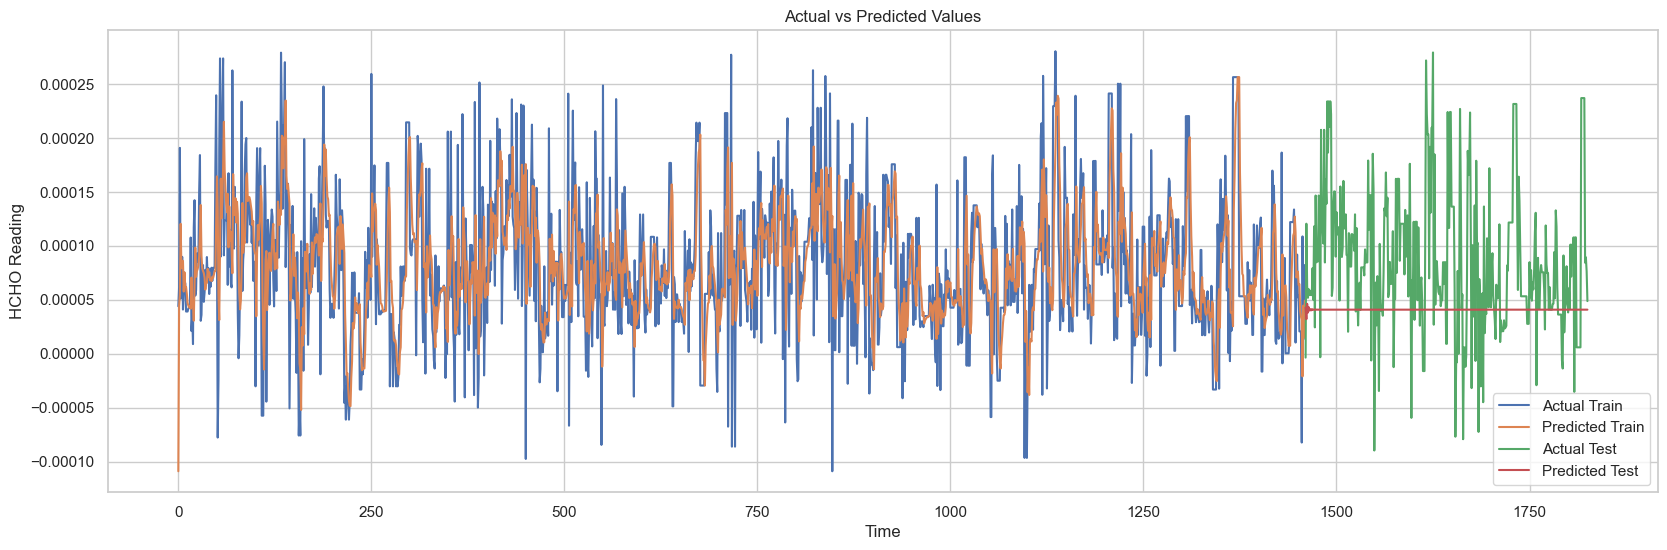

Train MSE: 3.916839680378453e-09
Test MSE: 6.225429831200968e-09
Train R2 Score: 0.10971038123083943
Test R2 Score: -0.4862009677841581


In [237]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Load dataset
data = pd.read_csv(r"..\processed data\temp\nuwara_eliya_fomaldehyde.csv")
data.drop(columns=['Location','Next_Date'], inplace=True)

# Preprocessing
scaler = MinMaxScaler()
data['HCHO_reading'] = scaler.fit_transform(data['HCHO_reading'].values.reshape(-1, 1))

# Test size can be adjusted based on your needs (e.g., 0.2 for 20% test data)
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)

# Fit ARIMA model
model = ARIMA(train_data['HCHO_reading'], order=(5,1,0)) # You may need to adjust the order based on the data
arima_model = model.fit()

# Make predictions
train_predictions = arima_model.predict(start=train_data.index[0], end=train_data.index[-1], typ='levels')
test_predictions = arima_model.predict(start=test_data.index[0], end=test_data.index[-1], typ='levels')

# Invert scaling for predictions
train_predictions = scaler.inverse_transform(train_predictions.values.reshape(-1,1)).flatten()
test_predictions = scaler.inverse_transform(test_predictions.values.reshape(-1,1)).flatten()

# Invert scaling for actual values
y_train = scaler.inverse_transform(train_data['HCHO_reading'].values.reshape(-1,1)).flatten()
y_test = scaler.inverse_transform(test_data['HCHO_reading'].values.reshape(-1,1)).flatten()

# Plot actual vs predicted values
plt.figure(figsize=(20, 6))
plt.plot(train_data.index, y_train, label='Actual Train')
plt.plot(train_data.index, train_predictions, label='Predicted Train')
plt.plot(test_data.index, y_test, label='Actual Test')
plt.plot(test_data.index, test_predictions, label='Predicted Test')
plt.xlabel('Time')
plt.ylabel('HCHO Reading')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

# Calculate Mean Squared Error (MSE)
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')

# Calculate R2 Score
train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)

print(f'Train R2 Score: {train_r2}')
print(f'Test R2 Score: {test_r2}')


C:\Users\janak\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\janak\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\janak\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\janak\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\janak\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximu

Train MSE: 0.02333404424433574
Test MSE: 0.02064691253299249


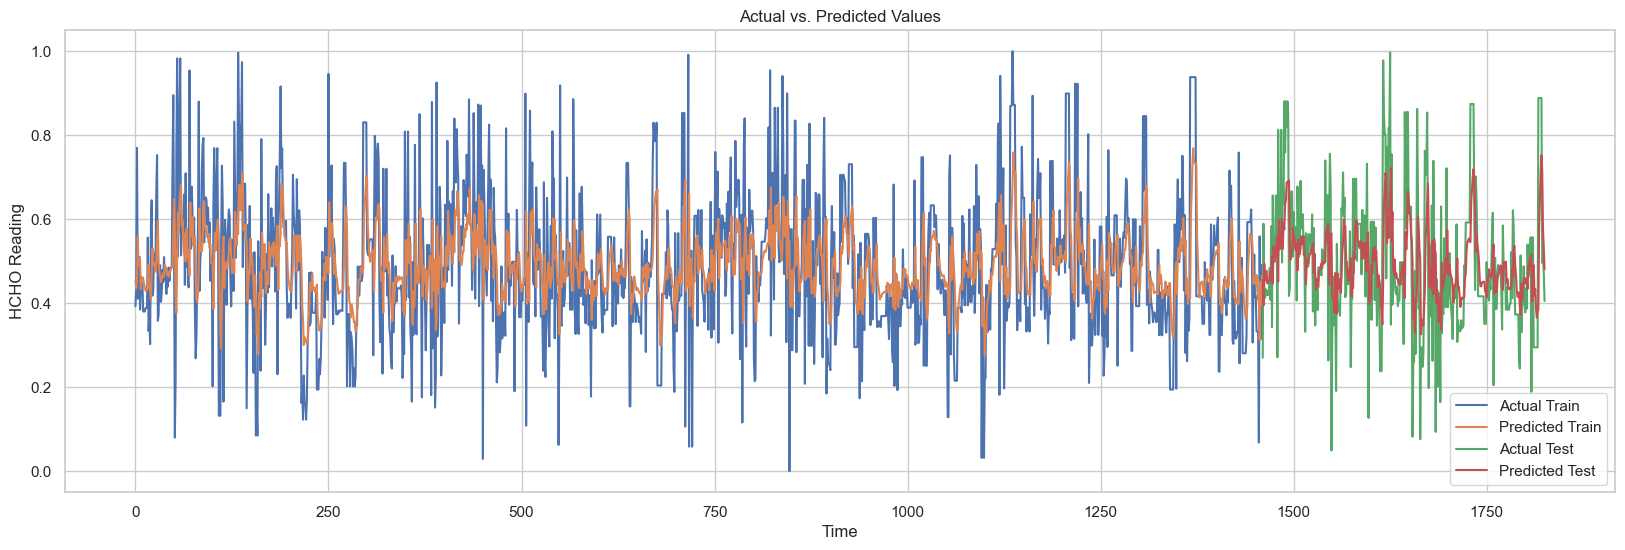

In [238]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
data = pd.read_csv(r"..\processed data\temp\nuwara_eliya_fomaldehyde.csv")
data.drop(columns=['Location', 'Next_Date'], inplace=True)

# Preprocessing
scaler = MinMaxScaler()
data['HCHO_reading'] = scaler.fit_transform(data['HCHO_reading'].values.reshape(-1, 1))

# Test size can be adjusted based on your needs (e.g., 0.2 for 20% test data)
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)

# Define ARIMA parameters
p = 5  # Autoregression (AR) order
d = 0  # Differencing (I) order
q = 1  # Moving Average (MA) order

# Train ARIMA model
model = ARIMA(train_data['HCHO_reading'], order=(p, d, q))
arima_model = model.fit()

# Forecast
history = train_data['HCHO_reading'].values.tolist()
train_predictions = []
test_predictions = []
for t in range(len(train_data)):
    model = ARIMA(history, order=(p, d, q))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    train_predictions.append(yhat)
    obs = train_data['HCHO_reading'].iloc[t]
    history.append(obs)

for t in range(len(test_data)):
    model = ARIMA(history, order=(p, d, q))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    test_predictions.append(yhat)
    obs = test_data['HCHO_reading'].iloc[t]
    history.append(obs)

# Evaluate the model
train_loss = mean_squared_error(train_data['HCHO_reading'], train_predictions)
test_loss = mean_squared_error(test_data['HCHO_reading'], test_predictions)

print(f'Train MSE: {train_loss}')
print(f'Test MSE: {test_loss}')

# Plotting
plt.figure(figsize=(20, 6))
plt.plot(train_data.index, train_data['HCHO_reading'], label='Actual Train')
plt.plot(train_data.index, train_predictions, label='Predicted Train')
plt.plot(test_data.index, test_data['HCHO_reading'], label='Actual Test')
plt.plot(test_data.index, test_predictions, label='Predicted Test')
plt.xlabel('Time')
plt.ylabel('HCHO Reading')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()


In [239]:
r2_score(test_data['HCHO_reading'], test_predictions)

0.2528643949006313

C:\Users\janak\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Train MSE: 5.301798761126804e-16
Test MSE: 6.371411916136121e-16


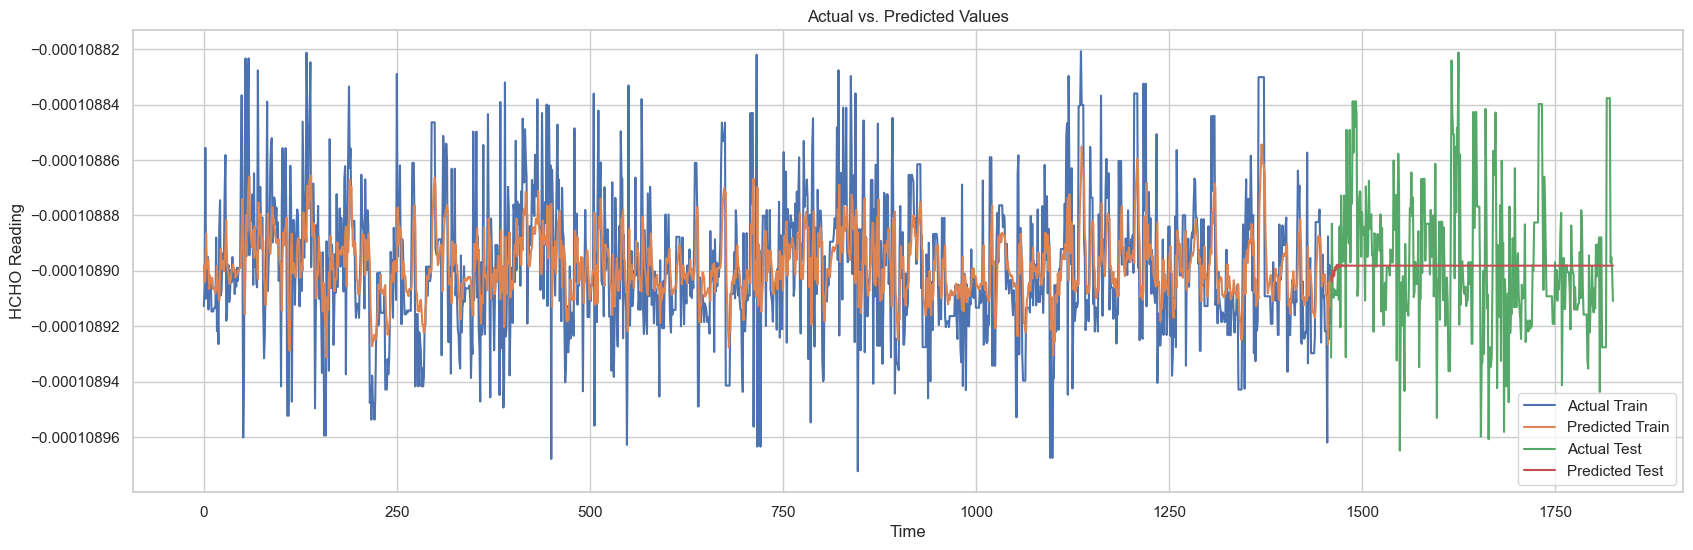

In [242]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
data = pd.read_csv(r"..\processed data\temp\nuwara_eliya_fomaldehyde.csv")
data.drop(columns=['Location', 'Next_Date'], inplace=True)

# # Preprocessing
# scaler = MinMaxScaler()
# data['HCHO_reading'] = scaler.fit_transform(data['HCHO_reading'].values.reshape(-1, 1))

# Test size can be adjusted based on your needs (e.g., 0.2 for 20% test data)
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)

# Define ARIMA parameters
p = 5  # Autoregression (AR) order
d = 0  # Differencing (I) order
q = 5  # Moving Average (MA) order

# Train ARIMA model
model = ARIMA(train_data['HCHO_reading'], order=(p, d, q))
arima_model = model.fit()

# Forecast
train_predictions = arima_model.predict(start=train_data.index[0], end=train_data.index[-1], typ='levels')
test_predictions = arima_model.predict(start=test_data.index[0], end=test_data.index[-1], typ='levels')

# Invert scaling for predictions
train_predictions = scaler.inverse_transform(train_predictions.values.reshape(-1,1)).flatten()
test_predictions = scaler.inverse_transform(test_predictions.values.reshape(-1,1)).flatten()

# Invert scaling for actual values
y_train = scaler.inverse_transform(train_data['HCHO_reading'].values.reshape(-1,1)).flatten()
y_test = scaler.inverse_transform(test_data['HCHO_reading'].values.reshape(-1,1)).flatten()

# Evaluate the model
train_loss = mean_squared_error(y_train, train_predictions)
test_loss = mean_squared_error(y_test, test_predictions)

print(f'Train MSE: {train_loss}')
print(f'Test MSE: {test_loss}')

# Plotting
plt.figure(figsize=(20, 6))
plt.plot(train_data.index, y_train, label='Actual Train')
plt.plot(train_data.index, train_predictions, label='Predicted Train')
plt.plot(test_data.index, y_test, label='Actual Test')
plt.plot(test_data.index, test_predictions, label='Predicted Test')
plt.xlabel('Time')
plt.ylabel('HCHO Reading')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()


C:\Users\janak\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


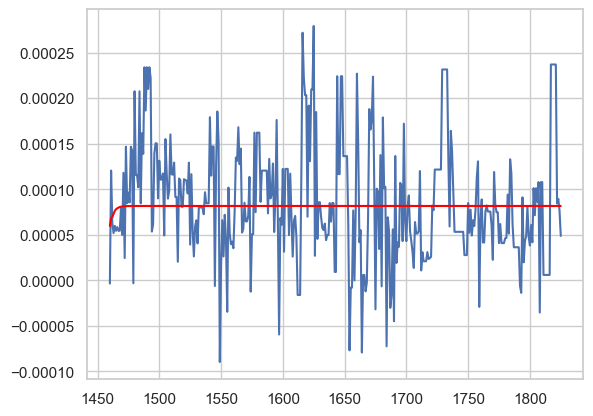

In [258]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv(r"..\processed data\temp\nuwara_eliya_fomaldehyde.csv")
data.drop(columns=['Location','Next_Date'],inplace=True)

# Preprocessing
# (Assuming data is already scaled, remove scaling if not needed)

# Test size can be adjusted based on your needs (e.g., 0.2 for 20% test data)
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)

# Define function to create sequences for ARIMA (not required)

# # Identify model order (p, d, q)
# plot_acf(data['HCHO_reading'])
# plot_pacf(data['HCHO_reading'])

model = ARIMA(train_data['HCHO_reading'], order=(3, 0, 3))
model_fit = model.fit()

# Make predictions
n_steps_ahead = 10  # Replace with desired number of steps to forecast
forecast = model_fit.forecast(steps=len(test_data))

# # Evaluate model performance
predictions = model_fit.fittedvalues
# mse = mean_squared_error(test_data['HCHO_reading'], predictions)
# print(f'Mean Squared Error: {mse}')

# Visualize results (optional)
plt.plot(test_data['HCHO_reading'])
plt.plot(forecast, color='red')
plt.show()

In [62]:
pip install pmdarima

  Obtaining dependency information for pmdarima from https://files.pythonhosted.org/packages/ac/f8/6c9364602b13f0dba129b53acd1344859690911a4d5021560d9fd6aa087f/pmdarima-2.0.4-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for Cython!=0.29.18,!=0.29.31,>=0.29 from https://files.pythonhosted.org/packages/18/ec/f47a721071d084d6c2b6783eb8d058b964b1450cb708d920d0d792f42001/Cython-3.0.10-cp311-cp311-win_amd64.whl.metadata
  Using cached Cython-3.0.10-cp311-cp311-win_amd64.whl.metadata (3.2 kB)
   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
    --------------------------------------- 10.2/614.7 kB ? eta -:--:--
   - ------------------------------------- 30.7/614.7 kB 435.7 kB/s eta 0:00:02
   ----- --------------------------------- 81.9/614.7 kB 762.6 kB/s eta 0:00:01
   ------------ --------------------------- 194.6/614.7 kB 1.3 MB/s eta 0:00:01
   ---------------- ----------------------- 256.0/614.7 kB 1.6 MB/s eta 0:00:01
   ------------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.


In [14]:
from pmdarima import auto_arima
import pandas as pd

# Define a function to filter data for a specific location
def filter_location(data, location):
    return data[data["Location"] == location]

# Load dataset for Nuwara Eliya
data = pd.read_csv(r"..\processed data\temp\colombo_fomaldehyde.csv")
data.drop(columns=['Location', 'Next_Date'], inplace=True)
data['Current_Date'] = pd.to_datetime(data['Current_Date'])
data.set_index('Current_Date', inplace=True)

# Fit ARIMA model
stepwise_fit = auto_arima(data['HCHO_reading'], trace=True, suppress_warnings=True)

# Print model summary
print("Summary for Nuwara Eliya:")
print(stepwise_fit.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-29595.789, Time=1.65 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-29001.867, Time=0.30 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-29358.351, Time=0.35 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-29107.498, Time=0.80 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-26406.054, Time=0.13 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-29504.971, Time=1.41 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-29500.667, Time=1.31 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-29584.420, Time=1.90 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-29595.132, Time=2.18 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-29480.489, Time=1.20 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-29485.652, Time=1.60 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-29536.309, Time=0.67 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-29634.916, Time=2.21 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=-29633.950, Time=2.26 sec
 ARIM

C:\Users\janak\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\janak\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:           HCHO_reading   No. Observations:                 1826
Model:               SARIMAX(5, 0, 5)   Log Likelihood               14834.548
Date:                Mon, 08 Apr 2024   AIC                         -29647.095
Time:                        15:11:36   BIC                         -29586.487
Sample:                    01-01-2019   HQIC                        -29624.739
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0333      0.001    -23.995      0.000      -0.036      -0.031
ar.L2         -0.3235      0.001   -241.308      0.000      -0.326      -0.321
ar.L3          0.7577      0.001    580.701      0.0

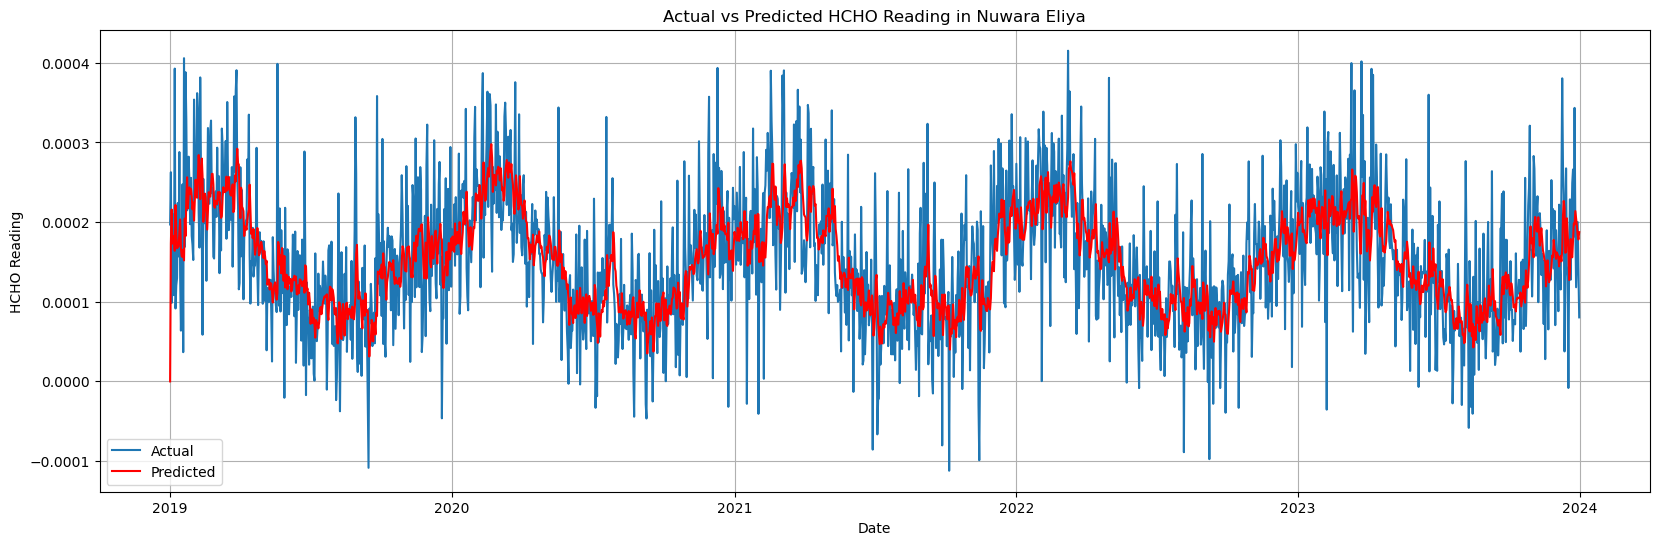

In [19]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load dataset for Nuwara Eliya
data = pd.read_csv(r"..\processed data\temp\colombo_fomaldehyde.csv")
data.drop(columns=['Location', 'Next_Date'], inplace=True)
data['Current_Date'] = pd.to_datetime(data['Current_Date'])
data.set_index('Current_Date', inplace=True)

# Define the SARIMA model with the parameters obtained from the summary
order = (5, 0, 5)
seasonal_order = (0, 0, 0, 0)  # Since there's no seasonal component
sarima_model = SARIMAX(data['HCHO_reading'], order=order, seasonal_order=seasonal_order)

# Fit the SARIMA model
sarima_result = sarima_model.fit()

# Print the summary of the SARIMA model
print(sarima_result.summary())


import matplotlib.pyplot as plt

# Get the predicted values of the SARIMA model
sarima_predicted = sarima_result.predict(start=data.index[0], end=data.index[-1])

# Plot actual vs predicted values
plt.figure(figsize=(20, 6))
plt.plot(data.index, data['HCHO_reading'], label='Actual')
plt.plot(data.index, sarima_predicted, color='red', label='Predicted')
plt.title('Actual vs Predicted HCHO Reading in Nuwara Eliya')
plt.xlabel('Date')
plt.ylabel('HCHO Reading')
plt.legend()
plt.grid(True)
plt.show()


In [17]:
r2_score(data['HCHO_reading'],sarima_predicted)

0.30270283462533587

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import RMSprop

# Assuming 'data' is your DataFrame and you've loaded it successfully

# Preprocess data
data['Current Date'] = pd.to_datetime(data['Current Date'])
data.sort_values(by='Current Date', inplace=True)
data.set_index('Current Date', inplace=True)

# Split data into train and test sets
train_size = int(len(data) * 0.8)
train, test = data.iloc[:train_size], data.iloc[train_size:]

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

# Define function to create sequences for RNN
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length)])
        y.append(data[i + seq_length, -1])  # Assuming target is the last column
    return np.array(X), np.array(y)

sequence_length = 2 # Adjust sequence length as necessary

# Create sequences for training and testing data
X_train, y_train = create_sequences(train_scaled, sequence_length)
X_test, y_test = create_sequences(test_scaled, sequence_length)

# Enhanced model with additional Bidirectional LSTM layers and Dropout layers
model = Sequential([
    Bidirectional(LSTM(units=1000, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.3),
    Bidirectional(LSTM(units=500, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.3),
    Bidirectional(LSTM(units=50, return_sequences=False)),
    Dropout(0.3),
    Dense(units=1)
])

optimizer = RMSprop(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_squared_error'])

# Early stopping to monitor the loss and prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=20, mode='min', restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, callbacks=[early_stopping])